In [157]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from IPython.display import Markdown

plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("pastel")
dtypes = pd.read_json("data_types.json", typ="json").to_dict()
raw_products = pd.read_csv(
    "fr.openfoodfacts.org.products.csv", delimiter="\t", dtype=dtypes
)

# Data Exploration

In [158]:
general_information = [
    "code",
    "url",
    "creator",
    "created_t",
    "created_datetime",
    "last_modified_t",
    "last_modified_datetime",
    "product_name",
    "generic_name",
    "quantity",
]

tags = [
    "pnns_groups_1",
    "pnns_groups_2",
    "packaging",
    "packaging_tags",
    "brands",
    "brands_tags",
    "categories",
    "categories_tags",
    "categories_fr",
    "origins",
    "origins_tags",
    "manufacturing_places",
    "manufacturing_places_tags",
    "labels",
    "labels_tags",
    "labels_fr",
    "emb_codes",
    "emb_codes_tags",
    "first_packaging_code_geo",
    "cities",
    "cities_tags",
    "states",
    "states_fr",
    "states_tags",
    "purchase_places",
    "stores",
    "countries",
    "countries_tags",
    "countries_fr",
]

misc_data = [
    "ingredients_text",
    "traces",
    "traces_fr",
    "traces_tags",
    "serving_size",
    "no_nutriments",
    "additives_n",
    "additives",
    "additives_fr",
    "additives_tags",
    "allergens",
    "allergens_fr",
    "ingredients_from_palm_oil_n",
    "ingredients_from_palm_oil",
    "ingredients_from_palm_oil_tags",
    "ingredients_that_may_be_from_palm_oil_n",
    "ingredients_that_may_be_from_palm_oil",
    "ingredients_that_may_be_from_palm_oil_tags",
    "nutrition_grade_fr",
    "main_category",
    "main_category_fr",
    "image_url",
    "image_small_url",
]

nutrition_facts = [
    "energy_100g",
    "energy-from-fat_100g",
    "fat_100g",
    "saturated-fat_100g",
    "butyric-acid_100g",
    "caproic-acid_100g",
    "caprylic-acid_100g",
    "capric-acid_100g",
    "lauric-acid_100g",
    "myristic-acid_100g",
    "palmitic-acid_100g",
    "stearic-acid_100g",
    "arachidic-acid_100g",
    "behenic-acid_100g",
    "lignoceric-acid_100g",
    "cerotic-acid_100g",
    "montanic-acid_100g",
    "melissic-acid_100g",
    "monounsaturated-fat_100g",
    "polyunsaturated-fat_100g",
    "omega-3-fat_100g",
    "alpha-linolenic-acid_100g",
    "eicosapentaenoic-acid_100g",
    "docosahexaenoic-acid_100g",
    "omega-6-fat_100g",
    "linoleic-acid_100g",
    "arachidonic-acid_100g",
    "gamma-linolenic-acid_100g",
    "dihomo-gamma-linolenic-acid_100g",
    "omega-9-fat_100g",
    "oleic-acid_100g",
    "elaidic-acid_100g",
    "gondoic-acid_100g",
    "mead-acid_100g",
    "erucic-acid_100g",
    "nervonic-acid_100g",
    "trans-fat_100g",
    "cholesterol_100g",
    "carbohydrates_100g",
    "sugars_100g",
    "sucrose_100g",
    "glucose_100g",
    "fructose_100g",
    "lactose_100g",
    "maltose_100g",
    "maltodextrins_100g",
    "starch_100g",
    "polyols_100g",
    "fiber_100g",
    "proteins_100g",
    "casein_100g",
    "serum-proteins_100g",
    "nucleotides_100g",
    "salt_100g",
    "sodium_100g",
    "alcohol_100g",
    "vitamin-a_100g",
    "beta-carotene_100g",
    "vitamin-d_100g",
    "vitamin-e_100g",
    "vitamin-k_100g",
    "vitamin-c_100g",
    "vitamin-b1_100g",
    "vitamin-b2_100g",
    "vitamin-pp_100g",
    "vitamin-b6_100g",
    "vitamin-b9_100g",
    "folates_100g",
    "vitamin-b12_100g",
    "biotin_100g",
    "pantothenic-acid_100g",
    "silica_100g",
    "bicarbonate_100g",
    "potassium_100g",
    "chloride_100g",
    "calcium_100g",
    "phosphorus_100g",
    "iron_100g",
    "magnesium_100g",
    "zinc_100g",
    "copper_100g",
    "manganese_100g",
    "fluoride_100g",
    "selenium_100g",
    "chromium_100g",
    "molybdenum_100g",
    "iodine_100g",
    "caffeine_100g",
    "taurine_100g",
    "ph_100g",
    "fruits-vegetables-nuts_100g",
    "collagen-meat-protein-ratio_100g",
    "cocoa_100g",
    "chlorophyl_100g",
    "carbon-footprint_100g",
    "nutrition-score-fr_100g",
    "nutrition-score-uk_100g",
    "nutrition_grade_uk",
    "glycemic-index_100g",
    "water-hardness_100g",
]

data_sections = {
    "General Information": general_information,
    "Tags": tags,
    "Miscellaneous Data": misc_data,
    "Nutrition Facts": nutrition_facts,
}

In [159]:
display(raw_products.shape)

(320772, 162)

## Exploration by Section

## General Information

code                                                url  \
count          320749                                             320749   
unique         320749                                             320749   
top     0000000003087  http://world-fr.openfoodfacts.org/produit/0000...   
freq                1                                                  1   

                creator   created_t      created_datetime last_modified_t  \
count            320770      320769                320763          320772   
unique             3535      189567                189568          180495   
top     usda-ndb-import  1489077120  2017-03-09T10:37:09Z      1439141742   
freq             169868          20                    20              33   

       last_modified_datetime product_name  \
count                  320772       303010   
unique                 180495       221347   
top      2015-08-09T17:35:42Z    Ice Cream   
freq                       33          410   

                                             generic_name quantity  
count                                               52795   104819  
unique                                              38584    13826  
top     Pâtes alimentaires au blé dur de qualité supér...    500 g  
freq                                                  201     4669

code                                                url  \
140768  0748703011458  http://world-fr.openfoodfacts.org/produit/0748...   
4058    0011110860705  http://world-fr.openfoodfacts.org/produit/0011...   
221430  3275240312016  http://world-fr.openfoodfacts.org/produit/3275...   

                creator   created_t      created_datetime last_modified_t  \
140768  usda-ndb-import  1489075963  2017-03-09T16:12:43Z      1489075963   
4058    usda-ndb-import  1489062251  2017-03-09T12:24:11Z      1489062251   
221430    naudinsylvain  1401380793  2014-05-29T16:26:33Z      1489236075   

       last_modified_datetime                       product_name  \
140768   2017-03-09T16:12:43Z           Thousand Island Dressing   
4058     2017-03-09T12:24:11Z         Enriched Medium Grain Rice   
221430   2017-03-11T12:41:15Z  Camembert Bons Mayennais (22% MG)   

                                             generic_name quantity  
140768                                                NaN      NaN  
4058                                                  NaN      NaN  
221430  Fromage industriel de France, à pâte molle à c...    250 g

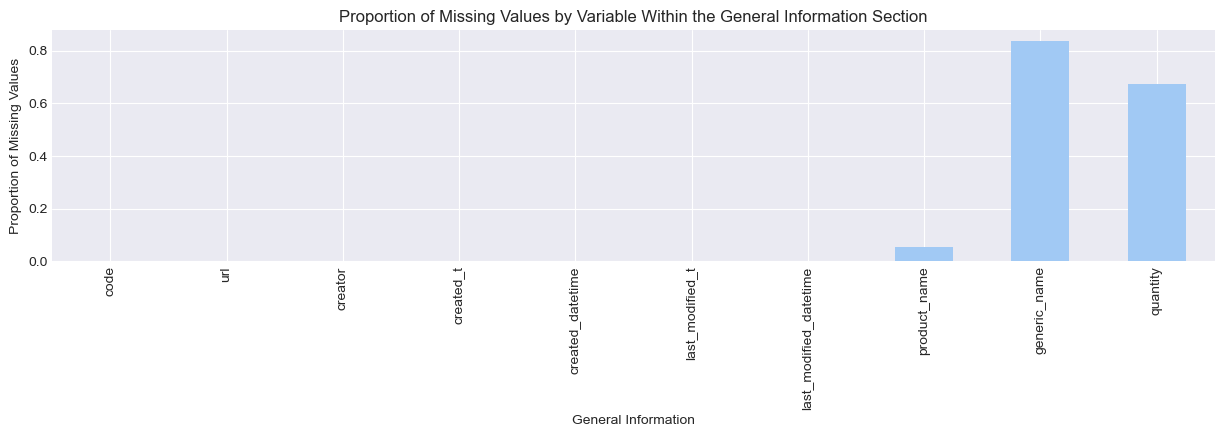

## Tags

pnns_groups_1 pnns_groups_2 packaging    packaging_tags     brands  \
count          91513         94491     78960             78961     292360   
unique            14            42     14547             12064      58784   
top          unknown       unknown    Carton  sachet,plastique  Carrefour   
freq           22624         22624      2153              3959       2978   

       brands_tags                                  categories  \
count       292352                                       84410   
unique       50253                                       36982   
top      carrefour  Snacks sucrés,Biscuits et gâteaux,Biscuits   
freq          3149                                         301   

                                          categories_tags  \
count                                               84389   
unique                                              21142   
top     en:sugary-snacks,en:biscuits-and-cakes,en:bisc...   
freq                                                  802   

                                     categories_fr origins  ... cities  \
count                                        84411   22190  ...     23   
unique                                       21152    4840  ...      3   
top     Snacks sucrés,Biscuits et gâteaux,Biscuits  France  ...      c   
freq                                           802    5171  ...      9   

                  cities_tags  \
count                   20320   
unique                   2572   
top     theix-morbihan-france   
freq                      270   

                                                   states  \
count                                              320726   
unique                                               1021   
top     en:to-be-completed, en:nutrition-facts-complet...   
freq                                               168905   

                                                states_fr  \
count                                              320726   
unique                                               1021   
top     A compléter,Informations nutritionnelles compl...   
freq                                               168905   

                                              states_tags purchase_places  \
count                                              320726           58193   
unique                                               1021            5120   
top     en:to-be-completed,en:nutrition-facts-complete...          France   
freq                                               168905           11762   

           stores countries    countries_tags countries_fr  
count       51722    320492            320492       320492  
unique       3259      1434               725          722  
top     Carrefour        US  en:united-states   États-Unis  
freq         6465    169928            172998       172998  

[4 rows x 29 columns]

pnns_groups_1 pnns_groups_2 packaging packaging_tags       brands  \
80556            NaN           NaN       NaN            NaN      Polaner   
198660       unknown       unknown       NaN            NaN          NaN   
45829            NaN           NaN       NaN            NaN  Antiuxixona   

        brands_tags                         categories  \
80556       polaner                                NaN   
198660          NaN  Non alimentaire,Open Beauty Facts   
45829   antiuxixona                                NaN   

                                  categories_tags  \
80556                                         NaN   
198660  en:non-food-products,en:open-beauty-facts   
45829                                         NaN   

                            categories_fr origins  ... cities cities_tags  \
80556                                 NaN     NaN  ...    NaN         NaN   
198660  Non alimentaire,Open Beauty Facts     NaN  ...    NaN         NaN   
45829                                 NaN     NaN  ...    NaN         NaN   

                                                   states  \
80556   en:to-be-completed, en:nutrition-facts-complet...   
198660  en:to-be-completed, en:nutrition-facts-to-be-c...   
45829   en:to-be-completed, en:nutrition-facts-complet...   

                                                states_fr  \
80556   A compléter,Informations nutritionnelles compl...   
198660  A compléter,Informations nutritionnelles à com...   
45829   A compléter,Informations nutritionnelles compl...   

                                              states_tags purchase_places  \
80556   en:to-be-completed,en:nutrition-facts-complete...             NaN   
198660  en:to-be-completed,en:nutrition-facts-to-be-co...             NaN   
45829   en:to-be-completed,en:nutrition-facts-complete...             NaN   

       stores countries    countries_tags countries_fr  
80556     NaN        US  en:united-states   États-Unis  
198660    NaN    France         en:france       France  
45829     NaN        US  en:united-states   États-Unis  

[3 rows x 29 columns]

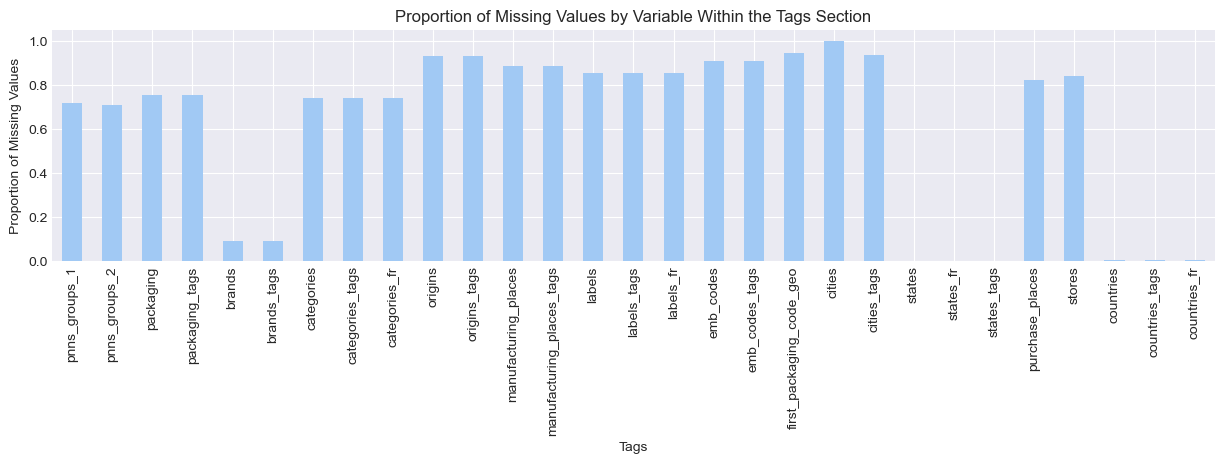

## Miscellaneous Data

ingredients_text          traces       traces_fr  \
count                              248962           24353           24352   
unique                             205520            8378            3584   
top     Carbonated water, natural flavor.  Fruits à coque  Fruits à coque   
freq                                  222            1240            2051   
mean                                  NaN             NaN             NaN   
std                                   NaN             NaN             NaN   
min                                   NaN             NaN             NaN   
25%                                   NaN             NaN             NaN   
50%                                   NaN             NaN             NaN   
75%                                   NaN             NaN             NaN   
max                                   NaN             NaN             NaN   

       traces_tags      serving_size  no_nutriments    additives_n  \
count        24329            211331            0.0  248939.000000   
unique        3578             25423            NaN            NaN   
top        en:nuts  240 ml (8 fl oz)            NaN            NaN   
freq          2051              5496            NaN            NaN   
mean           NaN               NaN            NaN       1.936024   
std            NaN               NaN            NaN       2.502019   
min            NaN               NaN            NaN       0.000000   
25%            NaN               NaN            NaN       0.000000   
50%            NaN               NaN            NaN       1.000000   
75%            NaN               NaN            NaN       3.000000   
max            NaN               NaN            NaN      31.000000   

                                                additives       additives_fr  \
count                                              248905             154680   
unique                                             196069              41537   
top      [ extra-virgin-olive-oil -> en:extra-virgin-o...  E322 - Lécithines   
freq                                                  397               8264   
mean                                                  NaN                NaN   
std                                                   NaN                NaN   
min                                                   NaN                NaN   
25%                                                   NaN                NaN   
50%                                                   NaN                NaN   
75%                                                   NaN                NaN   
max                                                   NaN                NaN   

       additives_tags  ... ingredients_from_palm_oil  \
count          154680  ...                       0.0   
unique          41537  ...                       NaN   
top           en:e322  ...                       NaN   
freq             8264  ...                       NaN   
mean              NaN  ...                       NaN   
std               NaN  ...                       NaN   
min               NaN  ...                       NaN   
25%               NaN  ...                       NaN   
50%               NaN  ...                       NaN   
75%               NaN  ...                       NaN   
max               NaN  ...                       NaN   

       ingredients_from_palm_oil_tags  \
count                            4835   
unique                             14   
top                    huile-de-palme   
freq                             4586   
mean                              NaN   
std                               NaN   
min                               NaN   
25%                               NaN   
50%                               NaN   
75%                               NaN   
max                               NaN   

        ingredients_that_may_be_from_palm_oil_n  \
count                             248939.000000   
unique                        

ingredients_text         traces  \
212849  Gras de porc, foie de porc, viande de lapin (2...           Œufs   
288177  Isomalt, extrait de réglisse (2.1%), extrait d...  phénylalanine   
62651   Apple juice, potassium sorbate, sodium benzoat...            NaN   

            traces_fr       traces_tags    serving_size  no_nutriments  \
212849           Œufs           en:eggs            40 g            NaN   
288177  Phenylalanine  fr:phenylalanine           2,5 g            NaN   
62651             NaN               NaN  240 ml (8 ONZ)            NaN   

        additives_n                                          additives  \
212849          3.0   [ gras-de-porc -> fr:gras-de-porc  ]  [ gras-...   
288177          7.0   [ isomalt -> en:e953  -> exists  -- ok  ]  [ ...   
62651           1.0   [ apple-juice -> en:apple-juice  ]  [ juice -...   

                                             additives_fr  \
212849  E250 - Nitrite de sodium,E150a - Caramel E150a...   
288177  E953 - Isomalt,E420 - Sorbitol,E510 - Chlorure...   
62651                            E201 - Sorbate de sodium   

                                           additives_tags  ...  \
212849                           en:e250,en:e150a,en:e451  ...   
288177  en:e953,en:e420,en:e510,en:e150a,en:e951,en:e9...  ...   
62651                                             en:e201  ...   

       ingredients_from_palm_oil ingredients_from_palm_oil_tags  \
212849                       NaN                            NaN   
288177                       NaN                            NaN   
62651                        NaN                            NaN   

        ingredients_that_may_be_from_palm_oil_n  \
212849                                      0.0   
288177                                      1.0   
62651                                       0.0   

        ingredients_that_may_be_from_palm_oil  \
212849                                    NaN   
288177                                    NaN   
62651                                     NaN   

       ingredients_that_may_be_from_palm_oil_tags  nutrition_grade_fr  \
212849                                        NaN                   d   
288177                             huile-vegetale                   b   
62651                                         NaN                   b   

        main_category main_category_fr  \
212849     en:terrine         Terrines   
288177     en:candies          Bonbons   
62651             NaN              NaN   

                                                image_url  \
212849  http://fr.openfoodfacts.org/images/products/32...   
288177  http://fr.openfoodfacts.org/images/products/76...   
62651                                                 NaN   

                                          image_small_url  
212849  http://fr.openfoodfacts.org/images/products/32...  
288177  http://fr.openfoodfacts.org/images/products/76...  
62651                                                 NaN  

[3 rows x 23 columns]

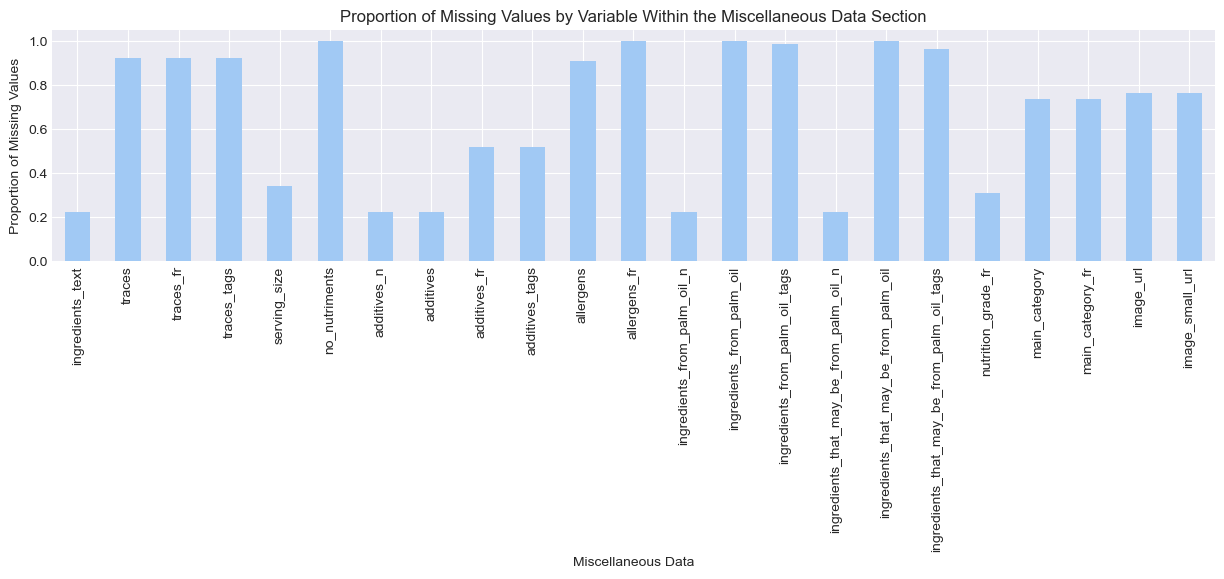

## Nutrition Facts

energy_100g  energy-from-fat_100g       fat_100g  saturated-fat_100g  \
count  2.611130e+05            857.000000  243891.000000       229554.000000   
mean   1.141915e+03            585.501214      12.730379            5.129932   
std    6.447154e+03            712.809943      17.578747            8.014238   
min    0.000000e+00              0.000000       0.000000            0.000000   
25%    3.770000e+02             49.400000       0.000000            0.000000   
50%    1.100000e+03            300.000000       5.000000            1.790000   
75%    1.674000e+03            898.000000      20.000000            7.140000   
max    3.251373e+06           3830.000000     714.290000          550.000000   

       butyric-acid_100g  caproic-acid_100g  caprylic-acid_100g  \
count                0.0                0.0                 1.0   
mean                 NaN                NaN                 7.4   
std                  NaN                NaN                 NaN   
min                  NaN                NaN                 7.4   
25%                  NaN                NaN                 7.4   
50%                  NaN                NaN                 7.4   
75%                  NaN                NaN                 7.4   
max                  NaN                NaN                 7.4   

       capric-acid_100g  lauric-acid_100g  myristic-acid_100g  ...  \
count          2.000000          4.000000                 1.0  ...   
mean           6.040000         36.136182                18.9  ...   
std            0.226274         24.101433                 NaN  ...   
min            5.880000          0.044730                18.9  ...   
25%            5.960000         34.661183                18.9  ...   
50%            6.040000         47.600000                18.9  ...   
75%            6.120000         49.075000                18.9  ...   
max            6.200000         49.300000                18.9  ...   

       fruits-vegetables-nuts_100g  collagen-meat-protein-ratio_100g  \
count                  3036.000000                        165.000000   
mean                     31.458587                         15.412121   
std                      31.967918                          3.753028   
min                       0.000000                          8.000000   
25%                       0.000000                         12.000000   
50%                      23.000000                         15.000000   
75%                      51.000000                         15.000000   
max                     100.000000                         25.000000   

       cocoa_100g  chlorophyl_100g  carbon-footprint_100g  \
count  948.000000              0.0             268.000000   
mean    49.547785              NaN             341.700764   
std     18.757932              NaN             425.211439   
min      6.000000              NaN               0.000000   
25%     32.000000              NaN              98.750000   
50%     50.000000              NaN             195.750000   
75%     64.250000              NaN             383.200000   
max    100.000000              NaN            2842.000000   

       nutrition-score-fr_100g  nutrition-score-uk_100g  nutrition_grade_uk  \
count            221210.000000            221210.000000                 0.0   
mean                  9.165535                 9.058049                 NaN   
std                   9.055903                 9.183589                 NaN   
min                 -15.000000               -15.000000                 NaN   
25%                   1.000000                 1.000000                 NaN   
50%                  10.000000                 9.000000                 NaN   
75%                  16.000000                16.000000                 NaN   
max                  40.000000                40.000000                 NaN   

       glycemic-index_100g  water-hardness_100g  
count                  0.0                  0.0  
mean                   NaN               

energy_100g  energy-from-fat_100g  fat_100g  saturated-fat_100g  \
175469        975.0                   NaN       8.6                 NaN   
117405        326.0                   NaN       0.0                 0.0   
215278          NaN                   NaN       NaN                 NaN   

        butyric-acid_100g  caproic-acid_100g  caprylic-acid_100g  \
175469                NaN                NaN                 NaN   
117405                NaN                NaN                 NaN   
215278                NaN                NaN                 NaN   

        capric-acid_100g  lauric-acid_100g  myristic-acid_100g  ...  \
175469               NaN               NaN                 NaN  ...   
117405               NaN               NaN                 NaN  ...   
215278               NaN               NaN                 NaN  ...   

        fruits-vegetables-nuts_100g  collagen-meat-protein-ratio_100g  \
175469                          NaN                               NaN   
117405                          NaN                               NaN   
215278                          NaN                               NaN   

        cocoa_100g  chlorophyl_100g  carbon-footprint_100g  \
175469         NaN              NaN                    NaN   
117405         NaN              NaN                    NaN   
215278         NaN              NaN                    NaN   

        nutrition-score-fr_100g  nutrition-score-uk_100g  nutrition_grade_uk  \
175469                      NaN                      NaN                 NaN   
117405                     -1.0                     -1.0                 NaN   
215278                      NaN                      NaN                 NaN   

        glycemic-index_100g  water-hardness_100g  
175469                  NaN                  NaN  
117405                  NaN                  NaN  
215278                  NaN                  NaN  

[3 rows x 100 columns]

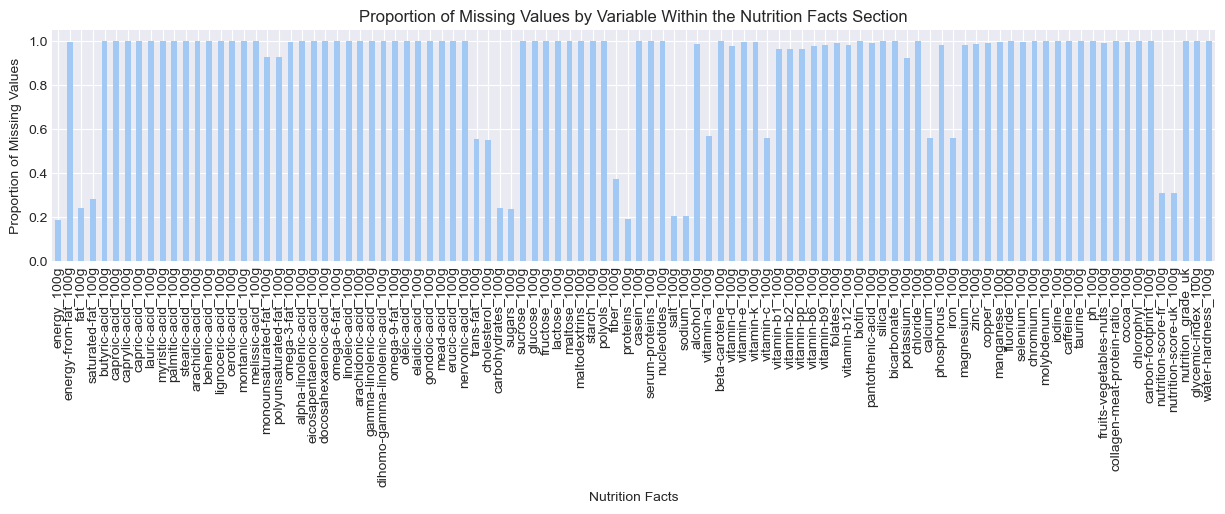

In [265]:
def plot_missing_data(df, section_name):
    plt.figure(figsize=[15, 3])
    df.isna().mean().plot(kind="bar")
    plt.title(
        f"Proportion of Missing Values by Variable Within the {section_name} Section"
    )
    plt.xlabel(section_name)
    plt.ylabel("Proportion of Missing Values")
    plt.show()


for name, section in data_sections.items():
    display(Markdown(f"## {name}"))
    display(raw_products[section].describe(include="all"))
    display(raw_products[section].sample(3))
    plot_missing_data(raw_products[section], name)

In [161]:
raw_products.isna().mean().mean()

0.7622157263195134

The data set contains a lot of missing data within each section, with the General Information section being the most complete. 

There is overall 76% of missing values, suggesting that the data set will require a lot of cleaning to be exploitable. 

## Feature Selection 

To start the cleaning process, we will set the cutoff at 50% to have a smaller data set. 

---

In [162]:
products = raw_products.loc[:, raw_products.isna().mean() < 0.5]

We can also remove the variables with duplicated information along with those that don't carry useful information:

In [163]:
products.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'brands',
       'brands_tags', 'countries', 'countries_tags', 'countries_fr',
       'ingredients_text', 'serving_size', 'additives_n', 'additives',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'states', 'states_tags', 'states_fr', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g'],
      dtype='object')

In [164]:
products = products.drop(
    columns=[
        "creator",
        "created_t",
        "url",
        "last_modified_datetime",
        "created_datetime",
        "brands",
        "ingredients_that_may_be_from_palm_oil_n",
        "last_modified_t",
        "brands_tags",
        "countries_tags",
        "countries",
        "countries_fr",
        "states_tags",
        "additives",
        "states",
        "states_fr",
        "nutrition-score-uk_100g",
        "serving_size",
        "ingredients_text",
        "ingredients_from_palm_oil_n",
        "additives_n",
    ]
)

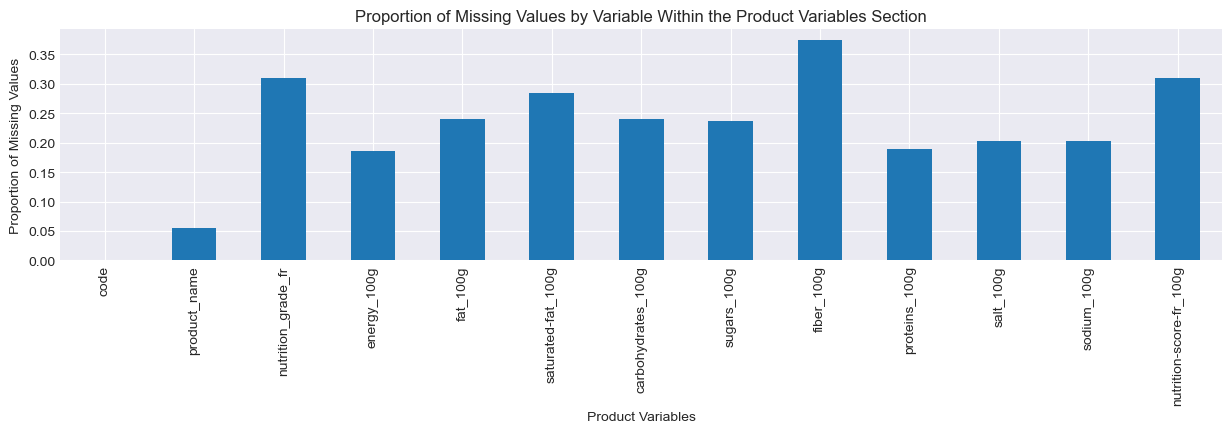

In [165]:
plot_missing_data(products, "Product Variables")

Check for duplicated entries: 

In [166]:
len(products.loc[products.duplicated(subset="code")])

22

In [167]:
products = products.loc[~products.duplicated(subset="code")]

# Data Cleaning

Check the column types to see whether there is erroneous data:

In [168]:
products.dtypes

code                        object
product_name                object
nutrition_grade_fr          object
energy_100g                float64
fat_100g                   float64
saturated-fat_100g         float64
carbohydrates_100g         float64
sugars_100g                float64
fiber_100g                 float64
proteins_100g              float64
salt_100g                  float64
sodium_100g                float64
nutrition-score-fr_100g    float64
dtype: object

The types are coherent with the nature of the feature

---

## Outliers

In [169]:
products.set_index("code", inplace=True)
products.describe()

energy_100g       fat_100g  saturated-fat_100g  carbohydrates_100g  \
count  2.611130e+05  243891.000000       229554.000000       243588.000000   
mean   1.141915e+03      12.730379            5.129932           32.073981   
std    6.447154e+03      17.578747            8.014238           29.731719   
min    0.000000e+00       0.000000            0.000000            0.000000   
25%    3.770000e+02       0.000000            0.000000            6.000000   
50%    1.100000e+03       5.000000            1.790000           20.600000   
75%    1.674000e+03      20.000000            7.140000           58.330000   
max    3.251373e+06     714.290000          550.000000         2916.670000   

         sugars_100g     fiber_100g  proteins_100g      salt_100g  \
count  244971.000000  200886.000000  259906.000000  255510.000000   
mean       16.003484       2.862111       7.076366       2.028624   
std        22.327284      12.867578       8.409137     128.269454   
min       -17.860000      -6.700000    -800.000000       0.000000   
25%         1.300000       0.000000       0.700000       0.063500   
50%         5.710000       1.500000       4.760000       0.581660   
75%        24.000000       3.600000      10.000000       1.374140   
max      3520.000000    5380.000000     430.000000   64312.800000   

         sodium_100g  nutrition-score-fr_100g  
count  255463.000000            221210.000000  
mean        0.798815                 9.165535  
std        50.504428                 9.055903  
min         0.000000               -15.000000  
25%         0.025000                 1.000000  
50%         0.229000                10.000000  
75%         0.541000                16.000000  
max     25320.000000                40.000000

The min and max values of nutrition information variables suggest that there are some outliers as the values should range between 0 and 100. 

The nutrition score ranges between -15 and 40 which is the correct range. 

---


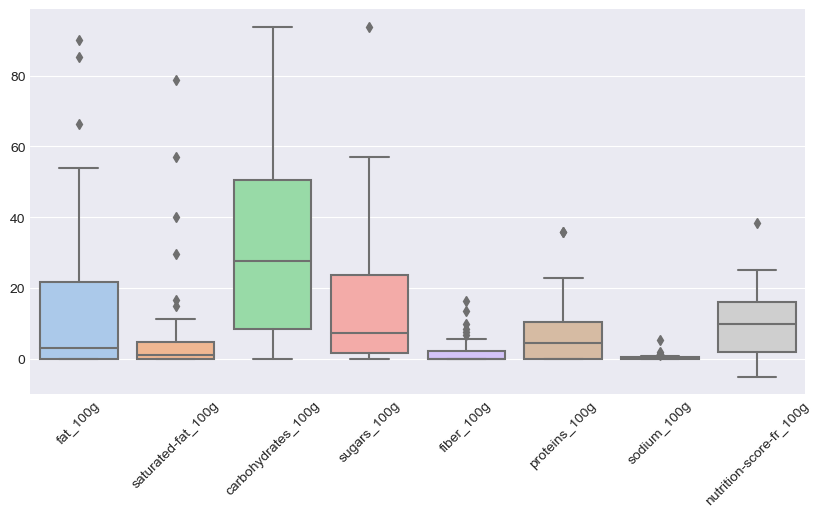

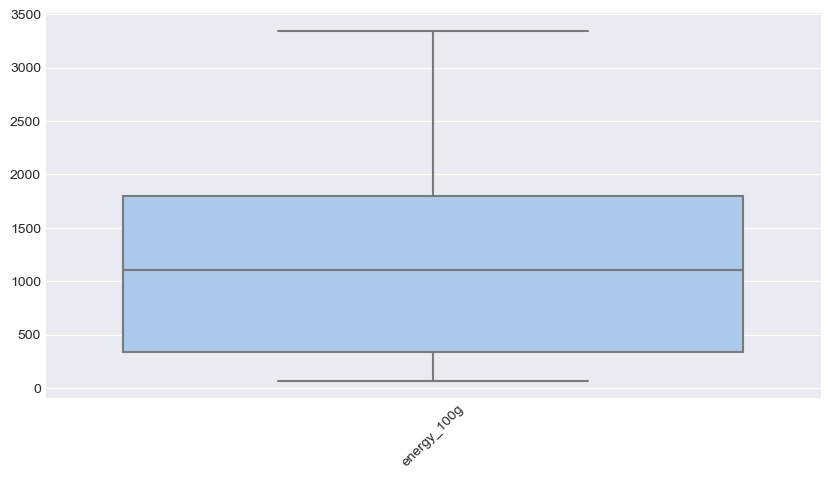

In [266]:
sample_outliers = products.sample(50).index


def map_outliers(df):
    plt.figure(figsize=[10, 5])
    sns.boxplot(df)
    plt.xticks(rotation=45)
    plt.show()


map_outliers(products.loc[sample_outliers, products.columns != "energy_100g"])
map_outliers(products.loc[sample_outliers, products.columns == "energy_100g"])

### Testing IQR method

In [171]:
products.isna().mean().mean()

0.23608989347882567

In [172]:
def remove_outliers(df):
    Q1 = np.nanpercentile(df, 25)
    Q3 = np.nanpercentile(df, 75)

    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[(df < lower_bound) | (df > upper_bound)] = np.nan
    return df


df = products.loc[:, ~products.columns.isin(["product_name", "nutrition_grade_fr"])]
products_without_outliers = df.apply(remove_outliers, axis=0)
products_without_outliers.isna().mean().mean()

0.2784551831644583

The IQR method removes a lot of data if we compare the percentage of missing values before and after outlier removal. 

In addition, the product nutrition values are not really comparable using such method, therefore a lot of values would be wrongly considered outliers.

We can try applying this method to a subgroup of products that are more likely to have similar value range:

In [173]:
products = products.merge(
    raw_products[["pnns_groups_1", "pnns_groups_2", "code"]],
    left_index=True,
    right_on="code",
)

In [174]:
products["pnns_groups_1"].unique()

array([nan, 'unknown', 'Fruits and vegetables', 'Sugary snacks',
       'Cereals and potatoes', 'Composite foods', 'Fish Meat Eggs',
       'Beverages', 'Fat and sauces', 'fruits-and-vegetables',
       'Milk and dairy products', 'Salty snacks', 'sugary-snacks',
       'cereals-and-potatoes', 'salty-snacks'], dtype=object)

In [175]:
mapping = {
    "vegetable|fruit": "Fruits and vegetables",
    "Sugary": "Sugary snacks",
    "sauces": "Fat and sauces",
    "Salty": "Salty snacks",
    "dairy|milk": "Milk and dairy products",
    "Composite": "Composite foods",
    "Fish|Meat|Eggs": "Fish Meat Eggs",
    "cereals|potatoes": "Cereals and potatoes",
    "Beverage": "Beverages",
}

products.loc[
    products["pnns_groups_1"].str.contains("unknown", case=False, na=False),
    "pnns_groups_1",
] = np.nan

for pattern, replacement in mapping.items():
    products.loc[
        products["pnns_groups_1"].str.contains(
            pattern, case=False, regex=True, na=False
        ),
        "pnns_groups_1",
    ] = replacement

unique_groups = products["pnns_groups_1"].unique()
print(unique_groups)

[nan 'Fruits and vegetables' 'Sugary snacks' 'Cereals and potatoes'
 'Composite foods' 'Fish Meat Eggs' 'Beverages' 'Fat and sauces'
 'Milk and dairy products' 'Salty snacks']


In [176]:
def get_pnns_groups(group=None):
    groups = {
        "dairy_products": "Milk and dairy products",
        "fruits_veggies": "Fruits and vegetables",
        "sugary_snacks": "Sugary snacks",
        "composite_foods": "Composite foods",
        "fish_meat_eggs": "Fish Meat Eggs",
        "beverages": "Beverages",
        "fat_sauces": "Fat and sauces",
        "cereals_potatoes": "Cereals and potatoes",
        "salty_snacks": "Salty snacks",
    }

    if group:
        return products.loc[products["pnns_groups_1"] == groups[group]]
    else:
        return {
            name: products.loc[products["pnns_groups_1"] == group]
            for name, group in groups.items()
        }


pnns_groups_1 = get_pnns_groups()

In [177]:
products["pnns_groups_2"].unique()

array([nan, 'unknown', 'Vegetables', 'Biscuits and cakes', 'Bread',
       'Legumes', 'Pizza pies and quiche', 'Meat', 'Sweets',
       'Non-sugared beverages', 'Sweetened beverages',
       'Dressings and sauces', 'One-dish meals', 'vegetables', 'Soups',
       'Chocolate products', 'Alcoholic beverages', 'Fruits', 'Sandwich',
       'Cereals', 'Milk and yogurt', 'Fats', 'Cheese', 'Appetizers',
       'Nuts', 'Breakfast cereals', 'Artificially sweetened beverages',
       'Fruit juices', 'Eggs', 'Fish and seafood', 'Dried fruits',
       'Ice cream', 'Processed meat', 'Potatoes', 'Dairy desserts',
       'Fruit nectars', 'pastries', 'Tripe dishes', 'fruits',
       'Salty and fatty products', 'cereals', 'legumes', 'nuts'],
      dtype=object)

In [178]:
products.loc[
    products["pnns_groups_2"].str.contains("unknown", case=False, na=False),
    "pnns_groups_2",
] = np.nan
products.loc[products["pnns_groups_2"].notna(), "pnns_groups_2"] = products.loc[
    products["pnns_groups_2"].notna(), "pnns_groups_2"
].str.capitalize()

products["pnns_groups_2"].unique()

array([nan, 'Vegetables', 'Biscuits and cakes', 'Bread', 'Legumes',
       'Pizza pies and quiche', 'Meat', 'Sweets', 'Non-sugared beverages',
       'Sweetened beverages', 'Dressings and sauces', 'One-dish meals',
       'Soups', 'Chocolate products', 'Alcoholic beverages', 'Fruits',
       'Sandwich', 'Cereals', 'Milk and yogurt', 'Fats', 'Cheese',
       'Appetizers', 'Nuts', 'Breakfast cereals',
       'Artificially sweetened beverages', 'Fruit juices', 'Eggs',
       'Fish and seafood', 'Dried fruits', 'Ice cream', 'Processed meat',
       'Potatoes', 'Dairy desserts', 'Fruit nectars', 'Pastries',
       'Tripe dishes', 'Salty and fatty products'], dtype=object)

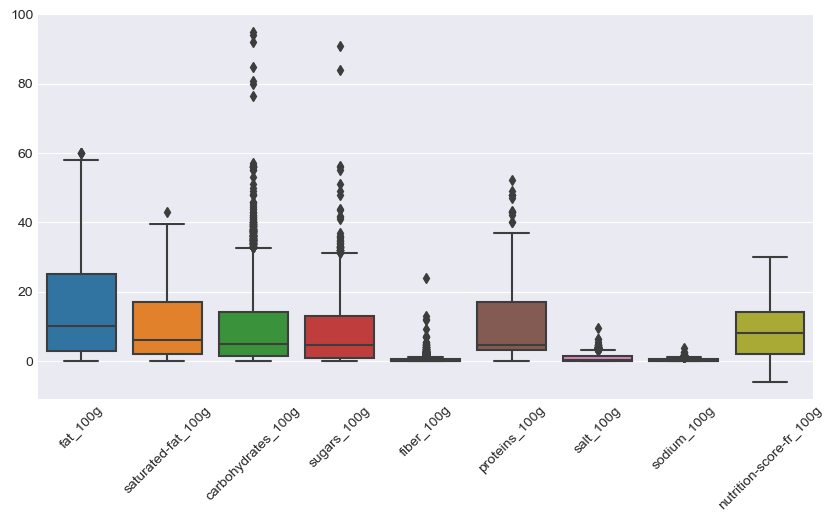

In [179]:
map_outliers(
    get_pnns_groups("dairy_products").loc[
        :, get_pnns_groups("dairy_products").columns != "energy_100g"
    ]
)

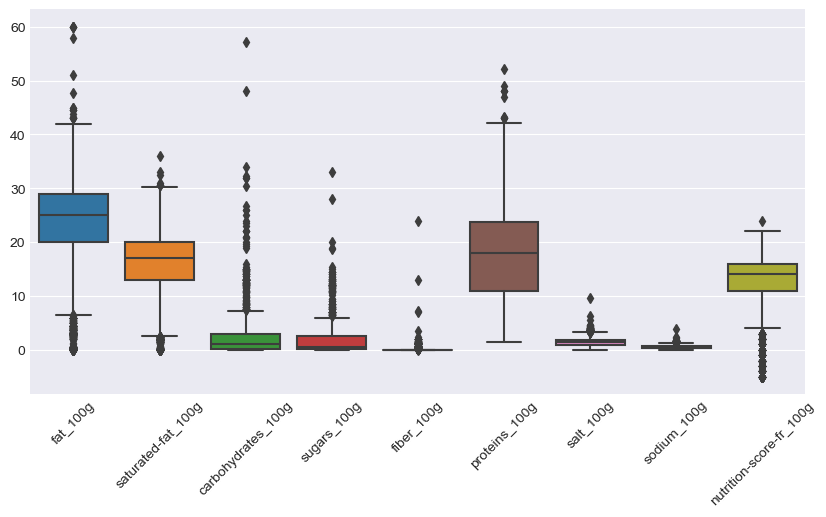

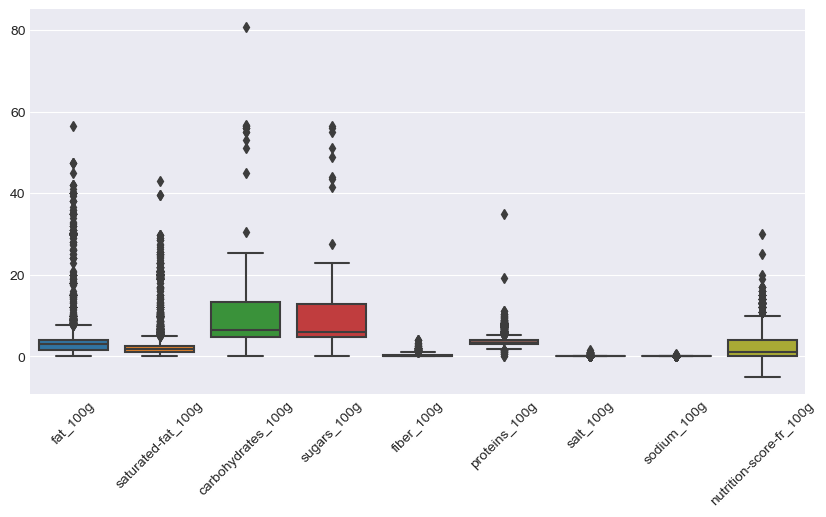

In [180]:
cheeses = products.loc[products["pnns_groups_2"] == "Cheese"]
milk_yogurts = products.loc[products["pnns_groups_2"] == "Milk and yogurt"]

map_outliers(cheeses.loc[:, cheeses.columns != "energy_100g"])
map_outliers(milk_yogurts.loc[:, milk_yogurts.columns != "energy_100g"])

There seems to be too many outliers identified with the IQR method even when products are grouped by pnns groups. 

We will therefore try a more business oriented approach to handling outliers

---

### Removing nutritional information outliers

Identifying outliers by the non null values outside of the 0-100 range for nutrition information:

In [181]:
nutrition_facts = [
    "fat_100g",
    "saturated-fat_100g",
    "carbohydrates_100g",
    "sugars_100g",
    "fiber_100g",
    "proteins_100g",
    "salt_100g",
    "sodium_100g",
]


def count_outliers(df=products):
    print(
        len(
            np.where(
                ((df[nutrition_facts] < 0) | (df[nutrition_facts] > 100))
                & df[nutrition_facts].notna()
            )[0]
        )
    )


count_outliers()

246


In [182]:
products[nutrition_facts] = np.where(
    ((products[nutrition_facts] < 0) | (products[nutrition_facts] > 100))
    & products[nutrition_facts].notna(),
    np.NAN,
    products[nutrition_facts],
)

count_outliers()

0


We can also remove all products whose carbs, fats and proteins amount to more than 100g:

In [183]:
erroneous_nutrition_facts = products.loc[
    products["carbohydrates_100g"] + products["fat_100g"] + products["proteins_100g"]
    > 101
]
erroneous_nutrition_facts

product_name nutrition_grade_fr  energy_100g  \
74      Organic Whole Brown Rice Flour                NaN       1891.0   
94        Unsalted Dry Roasted Almonds                NaN       2791.0   
129          Organic Rolled Rye Flakes                NaN       1674.0   
134               Organic Arboria Rice                NaN       1490.0   
220                    Chocolate Scone                  e       2912.0   
...                                ...                ...          ...   
317225                  Broccoli Chips                  c       1987.0   
317226             Cherry Tomato Chips                  d       1883.0   
317453                       Milk Rusk                  d       1971.0   
317701                           Dates                  a       1569.0   
320618              Jeenys Palm Sugar                   d       1690.0   

        fat_100g  saturated-fat_100g  carbohydrates_100g  sugars_100g  \
74          3.23                 NaN               96.77          NaN   
94         56.67                5.00               20.00         6.67   
129         2.00                 NaN               84.00          NaN   
134         2.22                 NaN               95.56          NaN   
220        39.29               23.21               80.36        46.43   
...          ...                 ...                 ...          ...   
317225     20.00                5.00               90.00        30.00   
317226     20.00                5.00               90.00        40.00   
317453     12.50                7.00               78.00        23.00   
317701      6.25                1.25               67.50        15.00   
320618      0.50                0.50              100.00        90.00   

        fiber_100g  proteins_100g  salt_100g  sodium_100g  \
74             6.4          12.90        NaN          NaN   
94            13.3          26.67        NaN          NaN   
129           16.0          16.00        NaN          NaN   
134            2.2          13.33        NaN          NaN   
220            3.6           5.36    0.63500        0.250   
...            ...            ...        ...          ...   
317225        15.0           5.00    0.00000        0.000   
317226        15.0           5.00    0.00000        0.000   
317453         3.0          11.00    1.16840        0.460   
317701        10.0          30.00    0.00000        0.000   
320618         0.1           1.00    0.02286        0.009   

        nutrition-score-fr_100g pnns_groups_1 pnns_groups_2           code  
74                          NaN           NaN           NaN  0000000033572  
94                          NaN           NaN           NaN  0000000034784  
129                         NaN           NaN           NaN  0000000038706  
134                         NaN           NaN           NaN  0000000039208  
220                        25.0           NaN           NaN   000002046231  
...                         ...           ...           ...            ...  
317225                     10.0           NaN           NaN  8855897000129  
317226                     12.0           NaN           NaN  8855897000136  
317453                     17.0           NaN           NaN  8901063136465  
317701                     -2.0           NaN           NaN   896245070353  
320618                     15.0           NaN           NaN  9556092706166  

[1254 rows x 15 columns]

In [184]:
products = products.drop(erroneous_nutrition_facts.index)
products.shape

(319518, 15)

### Removing energy feature outliers

For the energy feature, we can identify all products with energy levels that are superior to the usual maximum range for 100g worth of food, which would be about 3770kJ:

In [185]:
products.loc[products["energy_100g"] > 3770]

product_name nutrition_grade_fr  \
698     Bunge, Clear Liquid Soybean Frying Oil                NaN   
772       Ginger Candy Sweetened With Raw Cane                NaN   
3786                  All-Vegetable Shortening                NaN   
3810                  All Vegetable Shortening                NaN   
5440            Traditional Dusseldorf Mustard                NaN   
...                                        ...                ...   
316771                      Virgin Coconut Oil                NaN   
316772                 100% Virgin Coconut Oil                NaN   
317171                                     NaN                NaN   
319695                                    Miel                  e   
320561                  Chicken Cup Of Noodles                  d   

        energy_100g  fat_100g  saturated-fat_100g  carbohydrates_100g  \
698          3887.0     100.0               14.29                 0.0   
772          4435.0       0.0                 NaN                90.0   
3786         3837.0     100.0               25.00                 0.0   
3810         3837.0     100.0               29.17                 0.0   
5440         5690.0       0.0                 NaN                 0.0   
...             ...       ...                 ...                 ...   
316771       3887.0     100.0               71.43                 0.0   
316772       3887.0     100.0               71.43                 0.0   
317171      87217.0       0.0                 NaN                18.1   
319695       5925.0       NaN                0.00                 NaN   
320561       4602.0       NaN                4.70                 NaN   

        sugars_100g  fiber_100g  proteins_100g  salt_100g  sodium_100g  \
698             NaN         NaN            0.0      0.000          0.0   
772            90.0         NaN            0.0      0.000          0.0   
3786            NaN         NaN            0.0      0.000          0.0   
3810            NaN         NaN            0.0      0.000          0.0   
5440            0.0         NaN            0.0      3.302          1.3   
...             ...         ...            ...        ...          ...   
316771          NaN         NaN            0.0      0.000          0.0   
316772          NaN         NaN            0.0      0.000          0.0   
317171          8.8         NaN            3.8      0.000          0.0   
319695         82.0         0.0            0.0      0.000          0.0   
320561          4.0         0.0            9.7      0.000          0.0   

        nutrition-score-fr_100g pnns_groups_1 pnns_groups_2            code  
698                         NaN           NaN           NaN  00078684962026  
772                         NaN           NaN           NaN   0008274333381  
3786                        NaN           NaN           NaN   0011110846242  
3810                        NaN           NaN           NaN   0011110847478  
5440                        NaN           NaN           NaN   0011150090834  
...                         ...           ...           ...             ...  
316771                      NaN           NaN           NaN   8850367991839  
316772                      NaN           NaN           NaN   8850367991914  
317171                      NaN           NaN           NaN   8854404001734  
319695                     20.0           NaN           NaN   9310804500189  
320561                     14.0           NaN           NaN   9556001171337  

[340 rows x 15 columns]

We can replace the energy value for all products that contain 100g of fat to 3770:

In [186]:
products.loc[products["fat_100g"] == 100, "energy_100g"] = 3770

products.loc[products["energy_100g"] > 3770]

product_name nutrition_grade_fr  \
772                Ginger Candy Sweetened With Raw Cane                NaN   
5440                     Traditional Dusseldorf Mustard                NaN   
15660                                    Tamalito Candy                  e   
20070                                         Bread Mix                  e   
27849   100% Natural Non-Stick Canola Cooking Spray Oil                NaN   
...                                                 ...                ...   
313506               Nusco, Chocolate Spread, Chocolate                  e   
313852                           Cornetto Mini X8 Fruit                  e   
317171                                              NaN                NaN   
319695                                             Miel                  e   
320561                           Chicken Cup Of Noodles                  d   

        energy_100g  fat_100g  saturated-fat_100g  carbohydrates_100g  \
772          4435.0       0.0                 NaN                90.0   
5440         5690.0       0.0                 NaN                 0.0   
15660        5439.0       0.0                 0.0                90.0   
20070       10757.0       0.0                 0.0                 NaN   
27849        6975.0       0.0                 0.0                 0.0   
...             ...       ...                 ...                 ...   
313506     231199.0       NaN                 NaN                 NaN   
313852       5644.0       NaN                13.0                 NaN   
317171      87217.0       0.0                 NaN                18.1   
319695       5925.0       NaN                 0.0                 NaN   
320561       4602.0       NaN                 4.7                 NaN   

        sugars_100g  fiber_100g  proteins_100g  salt_100g  sodium_100g  \
772           90.00         NaN            0.0    0.00000     0.000000   
5440           0.00         NaN            0.0    3.30200     1.300000   
15660         80.00         0.0            0.0    0.40640     0.160000   
20070         14.29         0.0            0.0    5.62356     2.214000   
27849           NaN         NaN            0.0    0.00000     0.000000   
...             ...         ...            ...        ...          ...   
313506          NaN         NaN            NaN    0.01016     0.004000   
313852        24.00         0.0            3.7    0.12000     0.047244   
317171         8.80         NaN            3.8    0.00000     0.000000   
319695        82.00         0.0            0.0    0.00000     0.000000   
320561         4.00         0.0            9.7    0.00000     0.000000   

        nutrition-score-fr_100g pnns_groups_1 pnns_groups_2           code  
772                         NaN           NaN           NaN  0008274333381  
5440                        NaN           NaN           NaN  0011150090834  
15660                      21.0           NaN           NaN  0019962333026  
20070                      23.0           NaN           NaN  0023545202883  
27849                       NaN           NaN           NaN  0032251079443  
...                         ...           ...           ...            ...  
313506                     25.0           NaN           NaN  8710573641501  
313852                     25.0           NaN           NaN  8711200595631  
317171                      NaN           NaN           NaN  8854404001734  
319695                     20.0           NaN           NaN  9310804500189  
320561                     14.0           NaN           NaN  9556001171337  

[141 rows x 15 columns]

For the remaining energy outliers we can recalculate the value based on fats, carbs and proteins:

In [187]:
def calculate_energy(row):
    fat = row["fat_100g"] if not np.isnan(row["fat_100g"]) else 0
    carbohydrates = (
        row["carbohydrates_100g"] if not np.isnan(row["carbohydrates_100g"]) else 0
    )
    proteins = row["proteins_100g"] if not np.isnan(row["proteins_100g"]) else 0
    return (fat * 37) + (carbohydrates * 17) + (proteins * 17)


products.loc[products["energy_100g"] > 3770, "energy_100g"] = products.loc[
    products["energy_100g"] > 3770
].apply(calculate_energy, axis=1)

products.loc[products["energy_100g"] > 3770]

Empty DataFrame
Columns: [product_name, nutrition_grade_fr, energy_100g, fat_100g, saturated-fat_100g, carbohydrates_100g, sugars_100g, fiber_100g, proteins_100g, salt_100g, sodium_100g, nutrition-score-fr_100g, pnns_groups_1, pnns_groups_2, code]
Index: []

## Missing Data

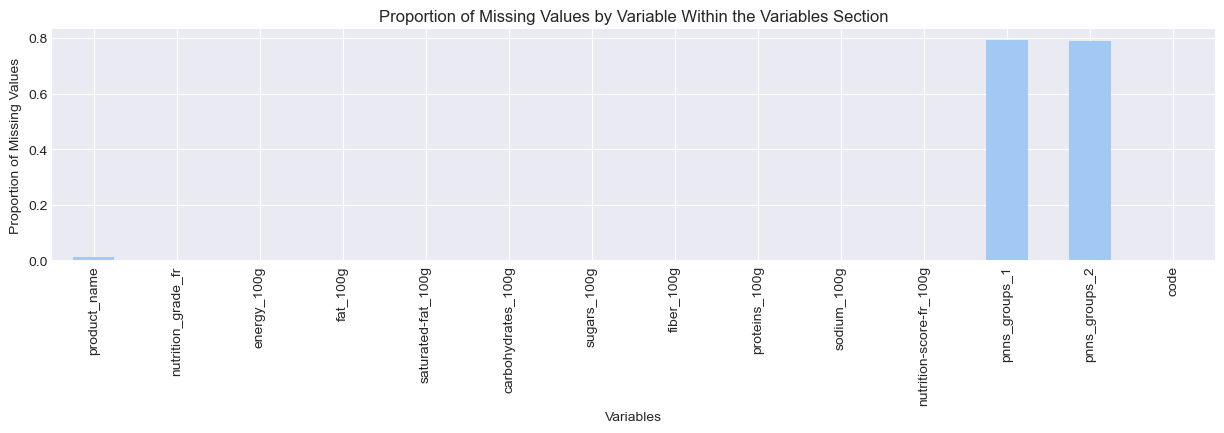

In [267]:
plot_missing_data(products, "Variables")

### Removing products with little data

We will drop all products with more than 60% of missing nutrition information as they contain too little data to base our suggestions on:

In [189]:
products_with_missing_data = products.loc[
    products[nutrition_facts].isna().mean(axis=1) > 0.6
]
products_with_missing_data.shape[0] / products.shape[0] * 100

19.955370276478945

In [190]:
products = products.drop(products_with_missing_data.index)

We will drop all products that contain only 0s and null values: 

In [191]:
nutrition_facts.append("energy_100g")
numeric_values = nutrition_facts.copy()
numeric_values.append("nutrition-score-fr_100g")

In [192]:
products_with_empty_data = products[
    np.all((products[numeric_values] == 0) | np.isnan(products[numeric_values]), axis=1)
]
products_with_all_0 = products[np.all(products[numeric_values] == 0, axis=1)].shape[0]

display(products_with_empty_data)

print(
    "Out of the "
    + str(products_with_empty_data.shape[0])
    + " products with missing data, "
    + str(products_with_all_0)
    + " has all values set to 0."
)
print(
    "About "
    + str(products_with_empty_data.shape[0] / products.shape[0] * 100)
    + "percent of data will be dropped."
)

product_name nutrition_grade_fr  \
252                                   Dieter's Herbal Tea                NaN   
483     Naturally Flavored Sparkling Mountain Spring W...                NaN   
484     Kevin Durant Kd 35 Limited Edition, Naturally ...                NaN   
485     Coconut Pineapple Naturally Flavored Sparkling...                NaN   
486     Peach Nectarine Naturally Flavored Sparkling M...                NaN   
...                                                   ...                ...   
317444                                           Tea Bags                NaN   
318331                                     Coca-cola zéro                  b   
318526                                           Oxygizer                NaN   
320316                                         Peppermint                NaN   
320768  Mint Melange Tea A Blend Of Peppermint, Lemon ...                  b   

        energy_100g  fat_100g  saturated-fat_100g  carbohydrates_100g  \
252             0.0       0.0                 NaN                 0.0   
483             0.0       0.0                 NaN                 0.0   
484             0.0       0.0                 NaN                 0.0   
485             0.0       0.0                 NaN                 0.0   
486             0.0       0.0                 NaN                 0.0   
...             ...       ...                 ...                 ...   
317444          0.0       0.0                 NaN                 0.0   
318331          0.0       0.0                 0.0                 0.0   
318526          0.0       0.0                 0.0                 0.0   
320316          0.0       0.0                 0.0                 0.0   
320768          0.0       0.0                 0.0                 0.0   

        sugars_100g  fiber_100g  proteins_100g  salt_100g  sodium_100g  \
252             NaN         NaN            0.0        0.0          0.0   
483             NaN         NaN            0.0        0.0          0.0   
484             0.0         NaN            0.0        0.0          0.0   
485             NaN         NaN            0.0        0.0          0.0   
486             NaN         NaN            0.0        0.0          0.0   
...             ...         ...            ...        ...          ...   
317444          NaN         NaN            0.0        0.0          0.0   
318331          0.0         0.0            0.0        0.0          0.0   
318526          0.0         0.0            0.0        NaN          NaN   
320316          NaN         NaN            0.0        0.0          0.0   
320768          0.0         0.0            0.0        0.0          0.0   

        nutrition-score-fr_100g pnns_groups_1          pnns_groups_2  \
252                         NaN           NaN                    NaN   
483                         NaN           NaN                    NaN   
484                         NaN           NaN                    NaN   
485                         NaN           NaN                    NaN   
486                         NaN           NaN                    NaN   
...                         ...           ...                    ...   
317444                      NaN           NaN                    NaN   
318331                      0.0     Beverages  Non-sugared beverages   
318526                      NaN     Beverages  Non-sugared beverages   
320316                      NaN           NaN                    NaN   
320768                      0.0           NaN                    NaN   

                  code  
252      0000105000417  
483     00016571910303  
484     00016571910310  
485     00016571940331  
486     00016571940348  
...                ...  
317444   8901035053608  
318331        90357725  
318526   9120002550011  
320316   9373536635635  
320768        99567453  

[3552 rows x 15 columns]

Out of the 3552 products with missing data, 489 has all values set to 0.
About 1.3888182923634544percent of data will be dropped.


In [193]:
products = products.drop(products_with_empty_data.index)

In [194]:
products.isna().mean().mean()

0.15807960455449602

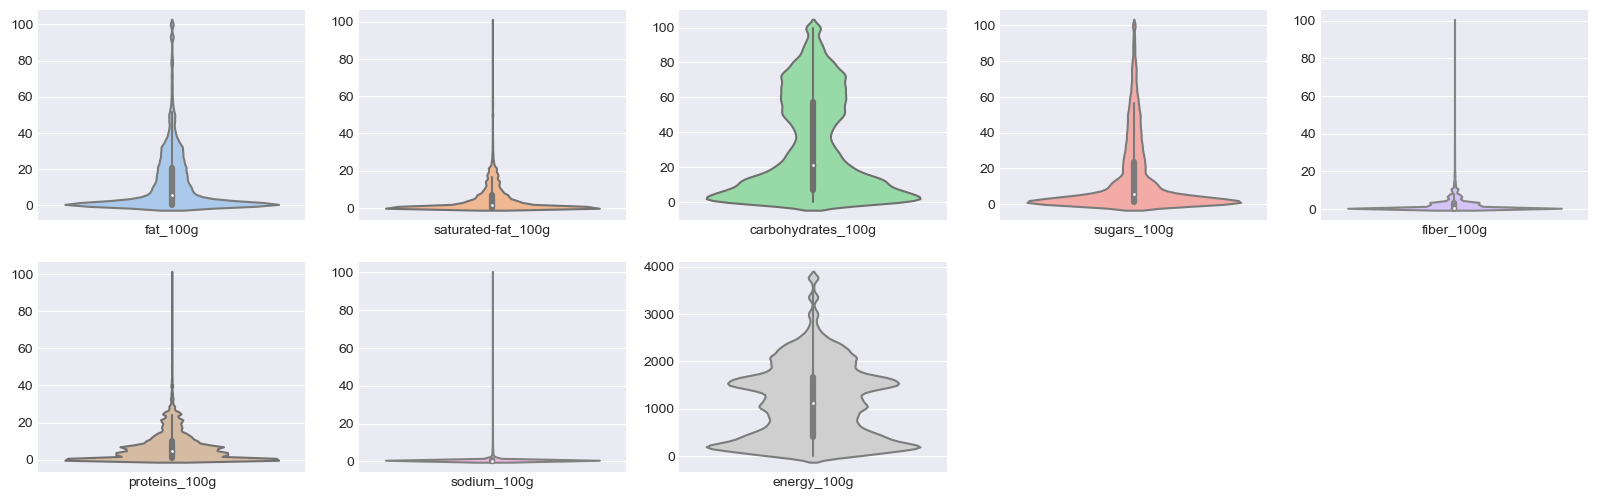

In [270]:
def plot_violin(df, feature=None):
    if feature:
        plt.figure(figsize=[3, 3])
        sns.violinplot(df[[feature]])
        plt.show()
    else:
        color_palette = sns.color_palette("pastel", len(nutrition_facts))
        plt.figure(figsize=(20, 6))
        for i, feature in enumerate(nutrition_facts):
            plt.subplot(2, 5, i + 1)
            sns.violinplot(df[[feature]], palette=[color_palette[i]])
        plt.show()


plot_violin(products)

### Calculating missing energy values

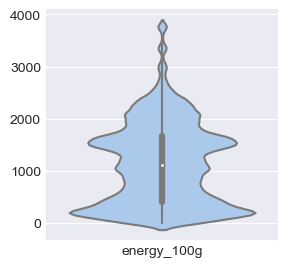

In [271]:
products.loc[products["energy_100g"].isna(), "energy_100g"] = products.loc[
    products["energy_100g"].isna()
].apply(calculate_energy, axis=1)

plot_violin(products, "energy_100g")

### Filling in values with 0

Fiber is mostly found in plant-based products, therefore all other products fiber value can be set to 0 if the value is NaN:

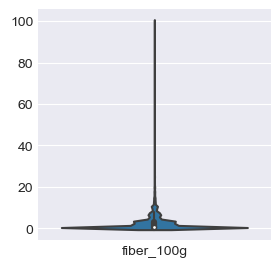

In [198]:
products.loc[
    ~(products["pnns_groups_1"].isin(["Fruits and vegetables", "Cereals and potatoes"]))
    & (products["fiber_100g"].isna()),
    "fiber_100g",
] = 0
plot_violin(products, "fiber_100g")

In [199]:
products["fiber_100g"].isna().mean()

0.007382882972185326

### Testing IterativeImputer with correlated features

To determine whether we can use the IterativeImputer method to fill in missing nutrition fact values, we will first identify whether there are significant correlations between features:

#### Identifying potential correlations

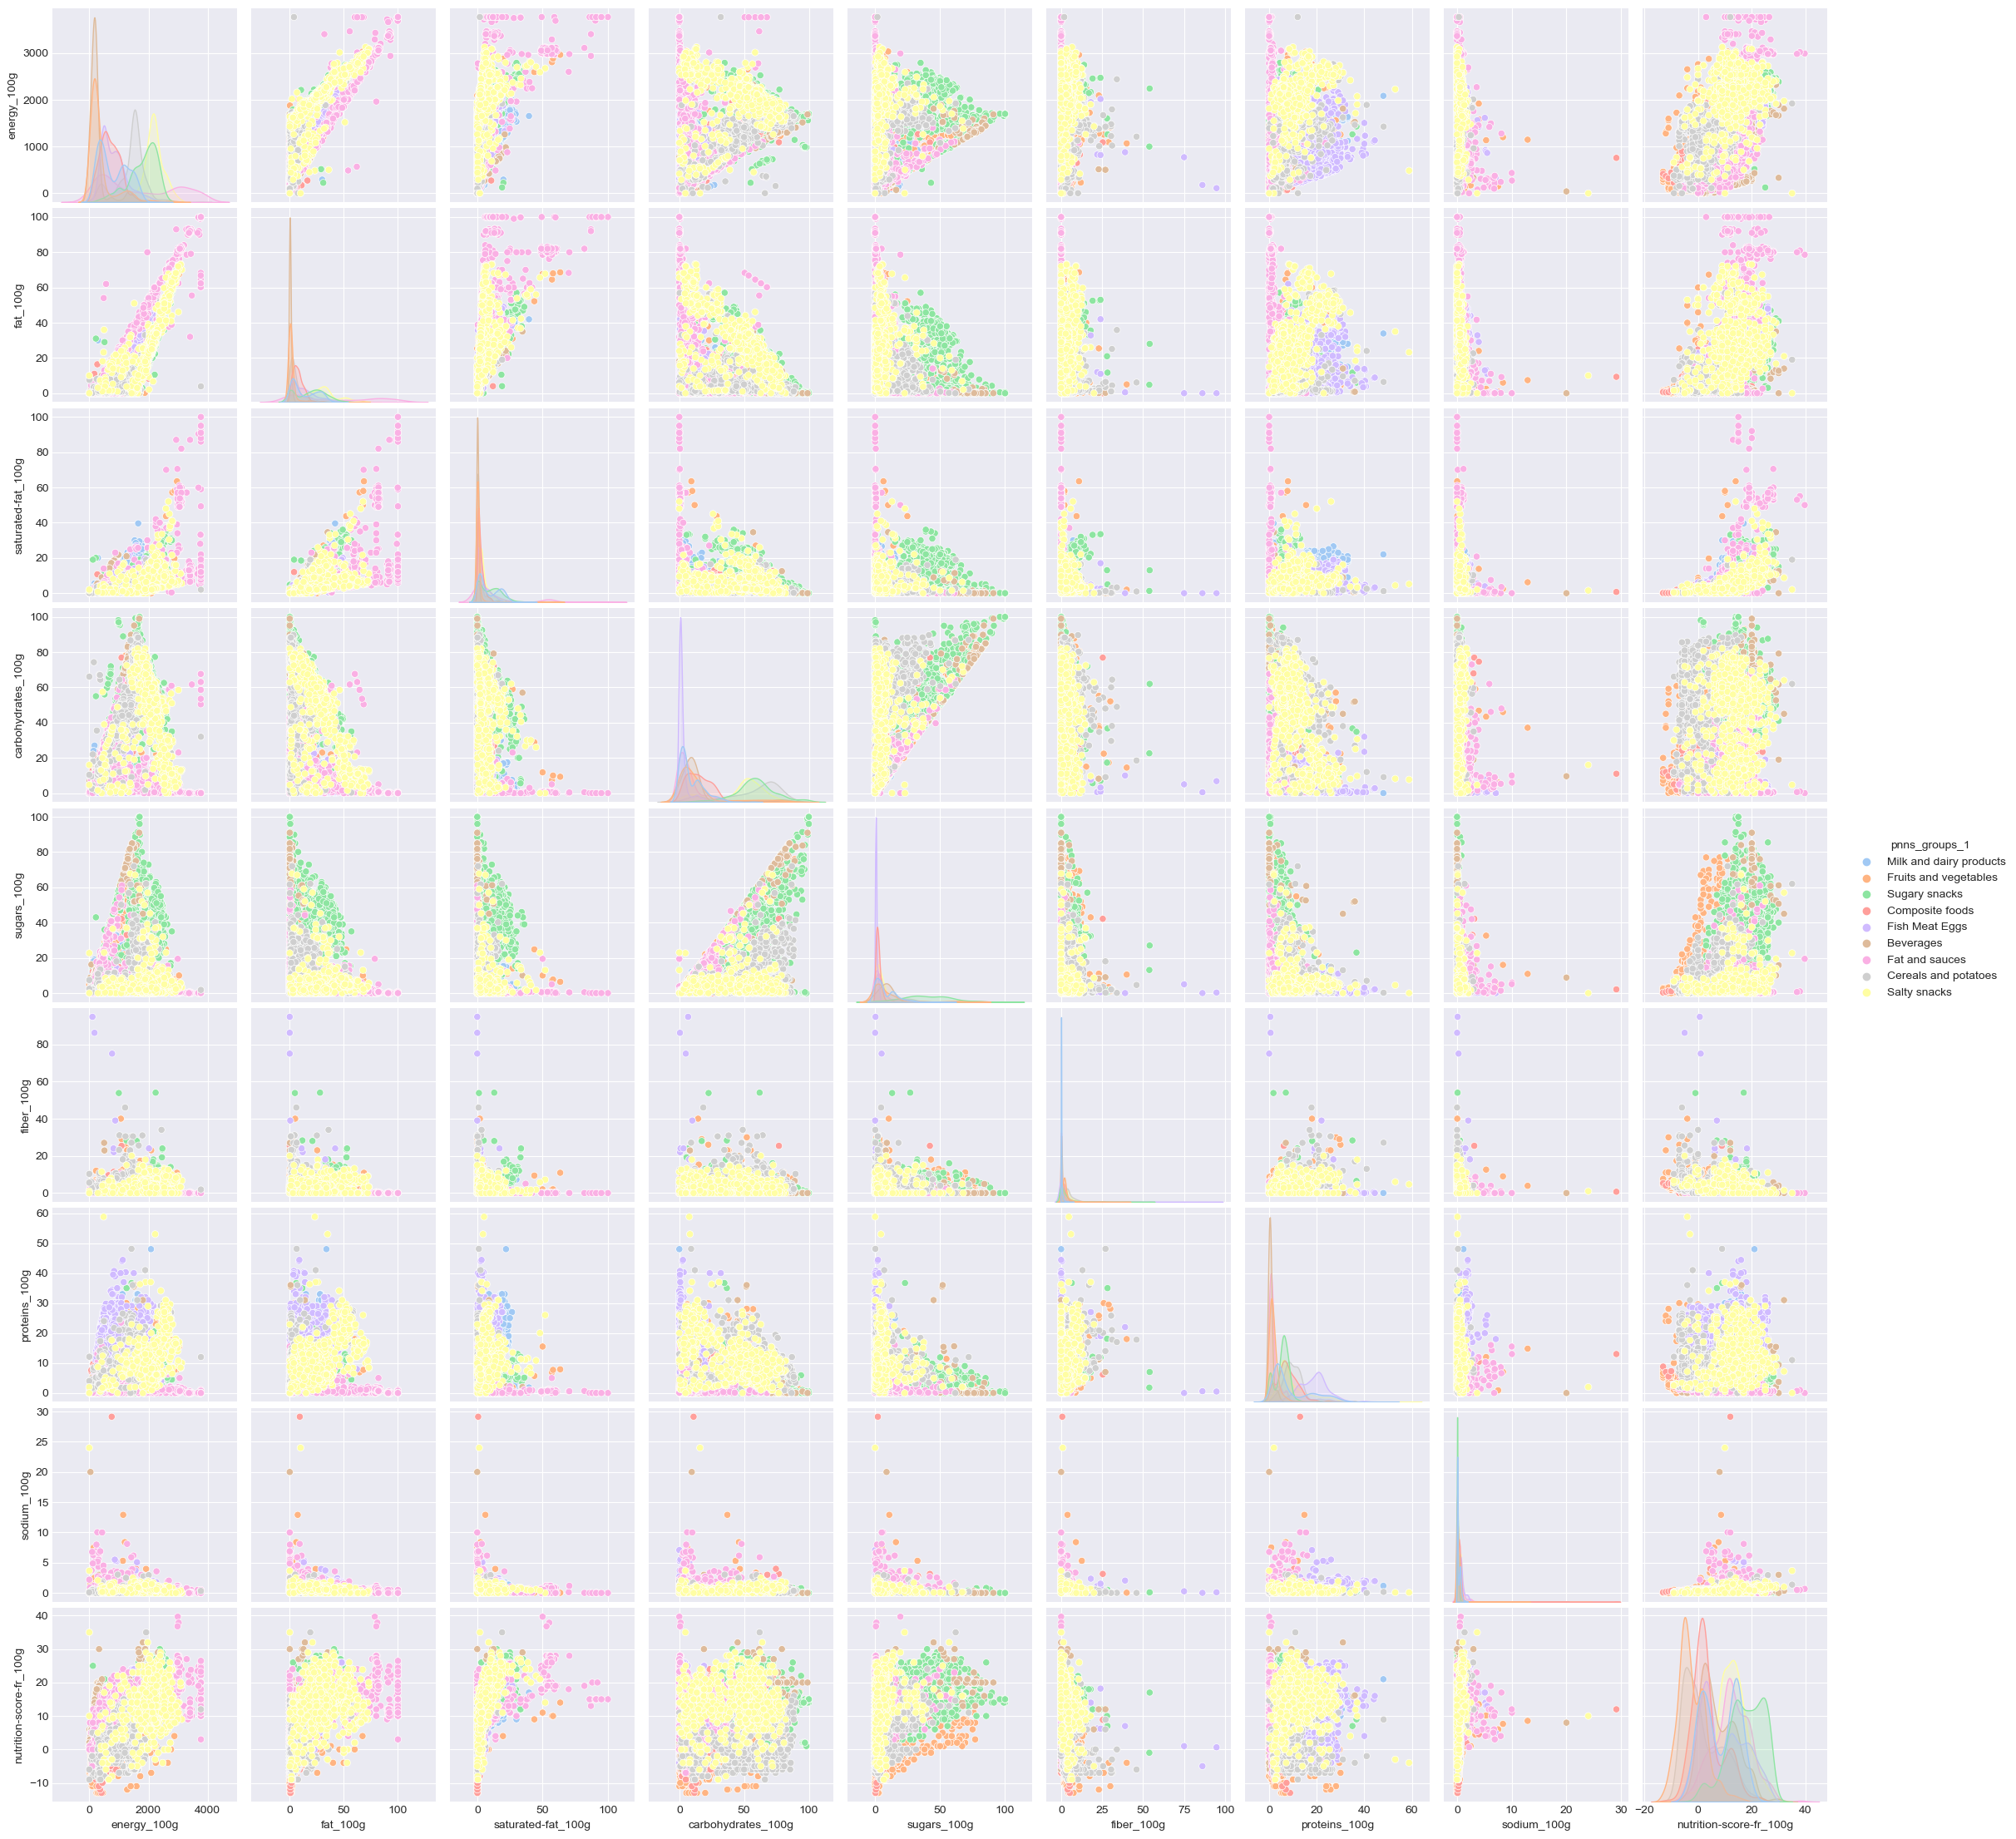

In [322]:
sample = []
for name, group in get_pnns_groups().items():
    sample.append(group.sample(1000))

sns.pairplot(pd.concat(sample), hue="pnns_groups_1")
plt.show()

This pairplot provides both a univariate and a bivariate analysis as it shows correlations between two features as well as the distribution of each feature. Adding the pnns_group as hue provides additional information, allowing for a multivariate analysis. 

The plots show a positive linear correlation between sugar and carbs that seems more significant for some groups than others, showing that some groups have lower levels of sugars and carbs than others. 

The kde plot of the nutrition score also shows interesting dustribution differences across food groups, with fruits and veggies clearly accounting for most of the lower grades while sugary snacks are on the higher end of the nutrition score. 


---

To have a better appreciation of the bivariate correlations, we can plot a heatmap based on the Pearson correlation coefficient.

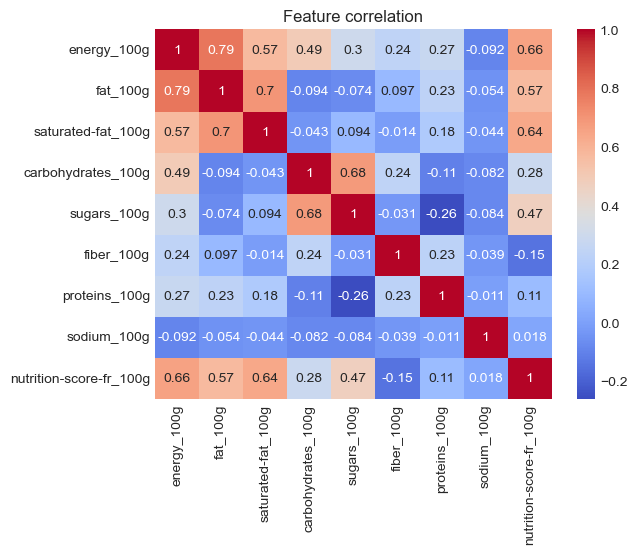

In [279]:
sns.heatmap(products.corr(numeric_only=True), cmap="coolwarm", annot=True)
plt.title("Feature correlation")
plt.show()

The most interesting relationships are between saturated fats and the nutrition score and between energy and nutri score, as in both cases, a 0.6 suggests that the higher the amount of saturated fats or energy, the higher the nutri score. 

The correlation between salt and sodium suggests that keeping both features would be redundant, we will therefore drop one of them

In [201]:
products = products.drop(columns=["salt_100g"])
numeric_values.remove("salt_100g")
nutrition_facts.remove("salt_100g")

#### Correlations by food groups 

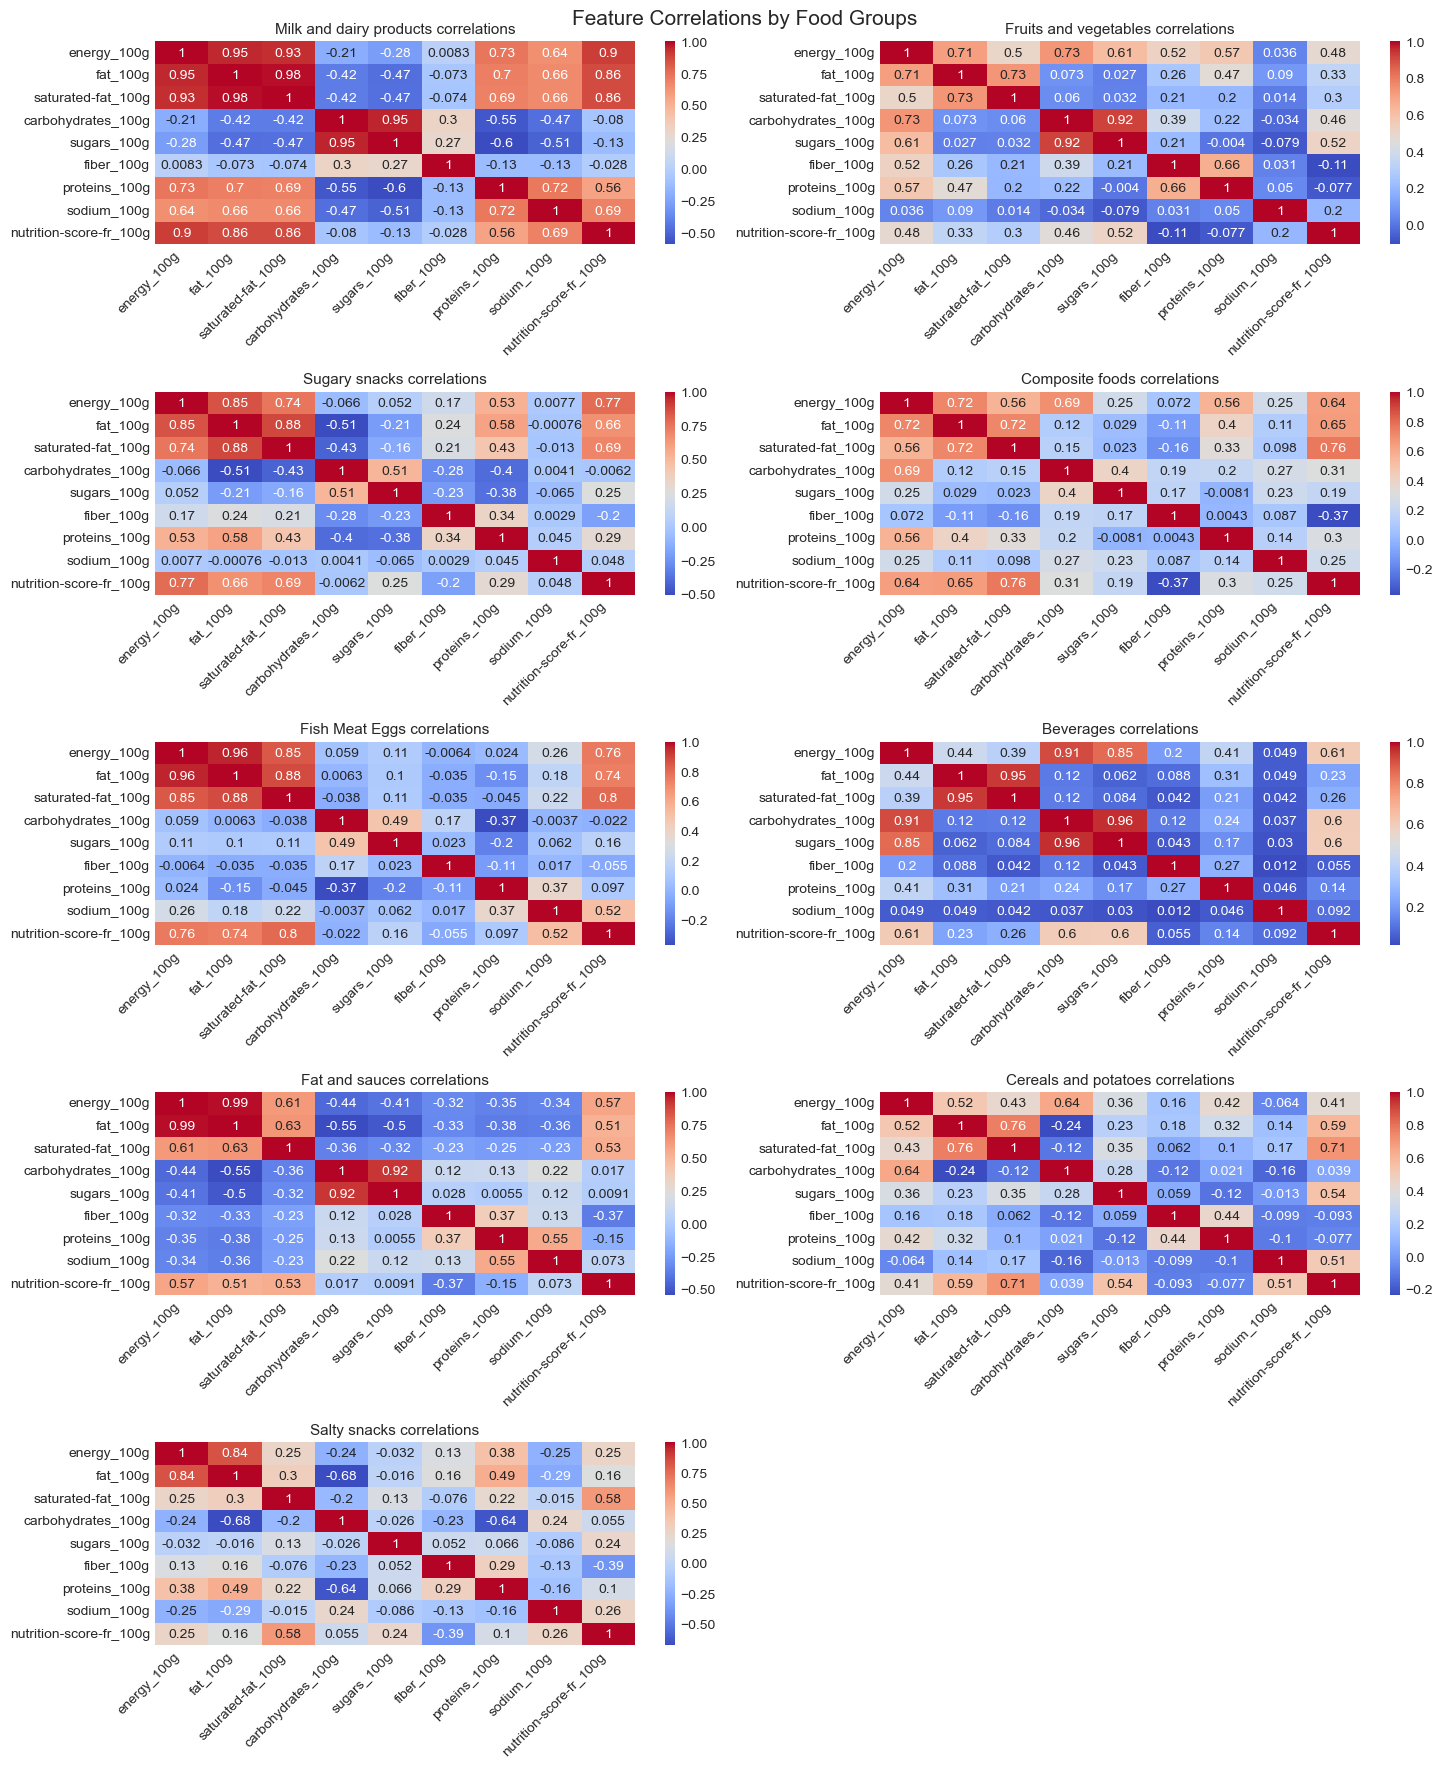

In [202]:
fig = plt.figure(figsize=(15, 18))
for i, (group_name, group_df) in enumerate(get_pnns_groups().items()):
    i += 1
    ax = plt.subplot(5, 2, i)
    correlation_matrix = group_df.corr(numeric_only=True)
    sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, ax=ax)
    ax.set_title(group_df.iloc[0]["pnns_groups_1"] + " correlations", fontsize=11)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
fig.suptitle("Feature Correlations by Food Groups", fontsize=15)
plt.tight_layout()
plt.show()

Food groups have an impact on correlations, which suggests that null values cannot be filled in using the same method over the entire data set without taking food groups into consideration

---

### Testing KNN

In [203]:
def test_knn(df, train_subset, target, plot=False):
    train = df.dropna(axis=0, how="any", subset=numeric_values)
    xtrain, xtest, ytrain, ytest = train_test_split(
        train[train_subset], train[target], train_size=0.8
    )
    scaler = StandardScaler()
    scaler.fit(xtrain)
    xtrain = scaler.transform(xtrain)
    xtest = scaler.transform(xtest)

    errors = []
    for k in range(2, 15):
        knn = neighbors.KNeighborsClassifier(k)
        errors.append(100 * (1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
    if plot:
        plt.plot(range(2, 15), errors, "o-")
        plt.show()
    else:
        display(
            df["pnns_groups_1"].iloc[0] + str(train.shape) + ": " + str(np.min(errors))
        )


for i, group in get_pnns_groups().items():
    test_knn(group, nutrition_facts, "nutrition-score-fr_100g")

'Milk and dairy products(6548, 14): 32.595419847328245'

'Fruits and vegetables(3193, 14): 40.845070422535215'

'Sugary snacks(9555, 14): 48.142333856619565'

'Composite foods(5431, 14): 72.12511499540018'

'Fish Meat Eggs(5141, 14): 43.5374149659864'

'Beverages(4954, 14): 38.74873864783047'

'Fat and sauces(3487, 14): 50.5730659025788'

'Cereals and potatoes(5549, 14): 43.6036036036036'

'Salty snacks(2262, 14): 60.04415011037527'

The KNN method yields very poor results when attempting to predict the nutrition score based on all other numeric values 

---

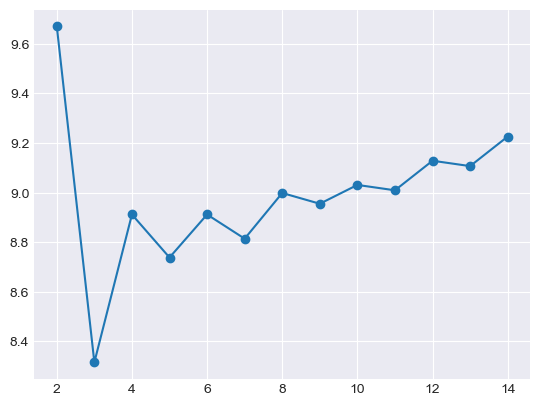

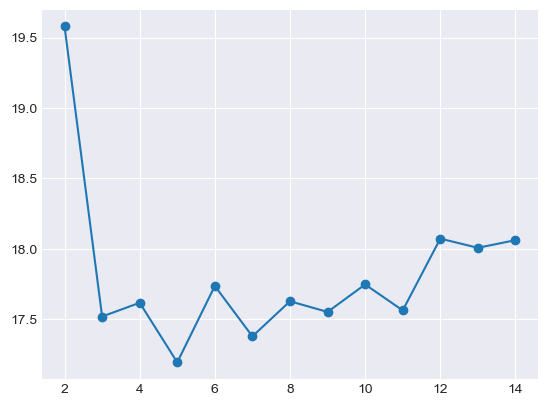

In [204]:
pnns_groups = products.dropna(
    axis=0, how="any", subset=["pnns_groups_2", "pnns_groups_1"]
)
test_knn(pnns_groups, numeric_values, "pnns_groups_1", True)
test_knn(pnns_groups, numeric_values, "pnns_groups_2", True)

In [205]:
train = pnns_groups.dropna(axis=0, how="any", subset=numeric_values)
xtrain, xtest, ytrain, ytest = train_test_split(
    train[numeric_values], train["pnns_groups_1"], train_size=0.8
)

knn = neighbors.KNeighborsClassifier(5)
knn.fit(xtrain, ytrain)

predicted = knn.predict(xtest)

misclassified_indices = ytest[ytest != predicted].index

comparison_df = pd.DataFrame(
    {"Original": ytest, "Predicted": predicted}, index=ytest.index
)
misclassified_rows = comparison_df.loc[
    comparison_df["Original"] != comparison_df["Predicted"]
]
misclassified_rows.sample(30)

Original                Predicted
300979           Fat and sauces    Fruits and vegetables
274848             Salty snacks     Cereals and potatoes
219054          Composite foods  Milk and dairy products
192827          Composite foods    Fruits and vegetables
320628                Beverages  Milk and dairy products
281424           Fish Meat Eggs          Composite foods
296474  Milk and dairy products          Composite foods
193288                Beverages    Fruits and vegetables
224880            Sugary snacks     Cereals and potatoes
221390    Fruits and vegetables                Beverages
306168            Sugary snacks     Cereals and potatoes
306551    Fruits and vegetables          Composite foods
251608     Cereals and potatoes             Salty snacks
211279    Fruits and vegetables          Composite foods
177062           Fat and sauces  Milk and dairy products
197727          Composite foods  Milk and dairy products
228831           Fat and sauces  Milk and dairy products
255383           Fat and sauces     Cereals and potatoes
189834          Composite foods           Fat and sauces
246018     Cereals and potatoes            Sugary snacks
199438          Composite foods    Fruits and vegetables
294505     Cereals and potatoes          Composite foods
312768           Fish Meat Eggs          Composite foods
196663             Salty snacks     Cereals and potatoes
257210           Fat and sauces    Fruits and vegetables
237390            Sugary snacks    Fruits and vegetables
202405             Salty snacks           Fish Meat Eggs
260349            Sugary snacks     Cereals and potatoes
240470            Sugary snacks    Fruits and vegetables
59812     Fruits and vegetables            Sugary snacks

The KNN method yields a better score when attempting to predict the pnns group 1 but when comparing the actual results, the predicted group is often too far from the expected result. We will therefore not be applying this imputation method as it could compromise further group based analyses. 

### Testing IterativeImputer method

Since there is an overall high correlation between saturated fat, fat, sugars, carbs, energy and the nutrition score, we will apply the IterativeImputer to these features

In [206]:
subset_columns = [
    "fat_100g",
    "energy_100g",
    "saturated-fat_100g",
    "carbohydrates_100g",
    "sugars_100g",
]
iterative_imputer_data = products.copy()

In [207]:
def apply_iterative_imputer(df, min, max):
    iterative_imputer = IterativeImputer(
        missing_values=np.nan, min_value=min, max_value=max
    )
    iterative_imputer.fit(df)
    return iterative_imputer.transform(df)

In [208]:
iterative_imputer_data[subset_columns] = apply_iterative_imputer(
    iterative_imputer_data[subset_columns], 0, 100
)

subset_columns.append("nutrition-score-fr_100g")
iterative_imputer_data[subset_columns] = apply_iterative_imputer(
    iterative_imputer_data[subset_columns], -15, 40
)

In [209]:
numeric_values

['fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'sodium_100g',
 'energy_100g',
 'nutrition-score-fr_100g']

In [280]:
def imputation_comparison(before, after):
    fig = plt.figure(figsize=(15, 10))
    for i, feature in enumerate(numeric_values):
        ax = plt.subplot(3, 3, i + 1)
        sns.kdeplot(
            x=before[feature], fill=True, color="blue", label="before_imputation"
        )
        sns.kdeplot(x=after[feature], fill=True, color="red", label="after_imputation")
        ax.set_title(feature)
    fig.legend(labels=["Before", "After"])
    fig.suptitle("Ditribution Comparison Before and After Imputation")
    plt.tight_layout()
    plt.show()

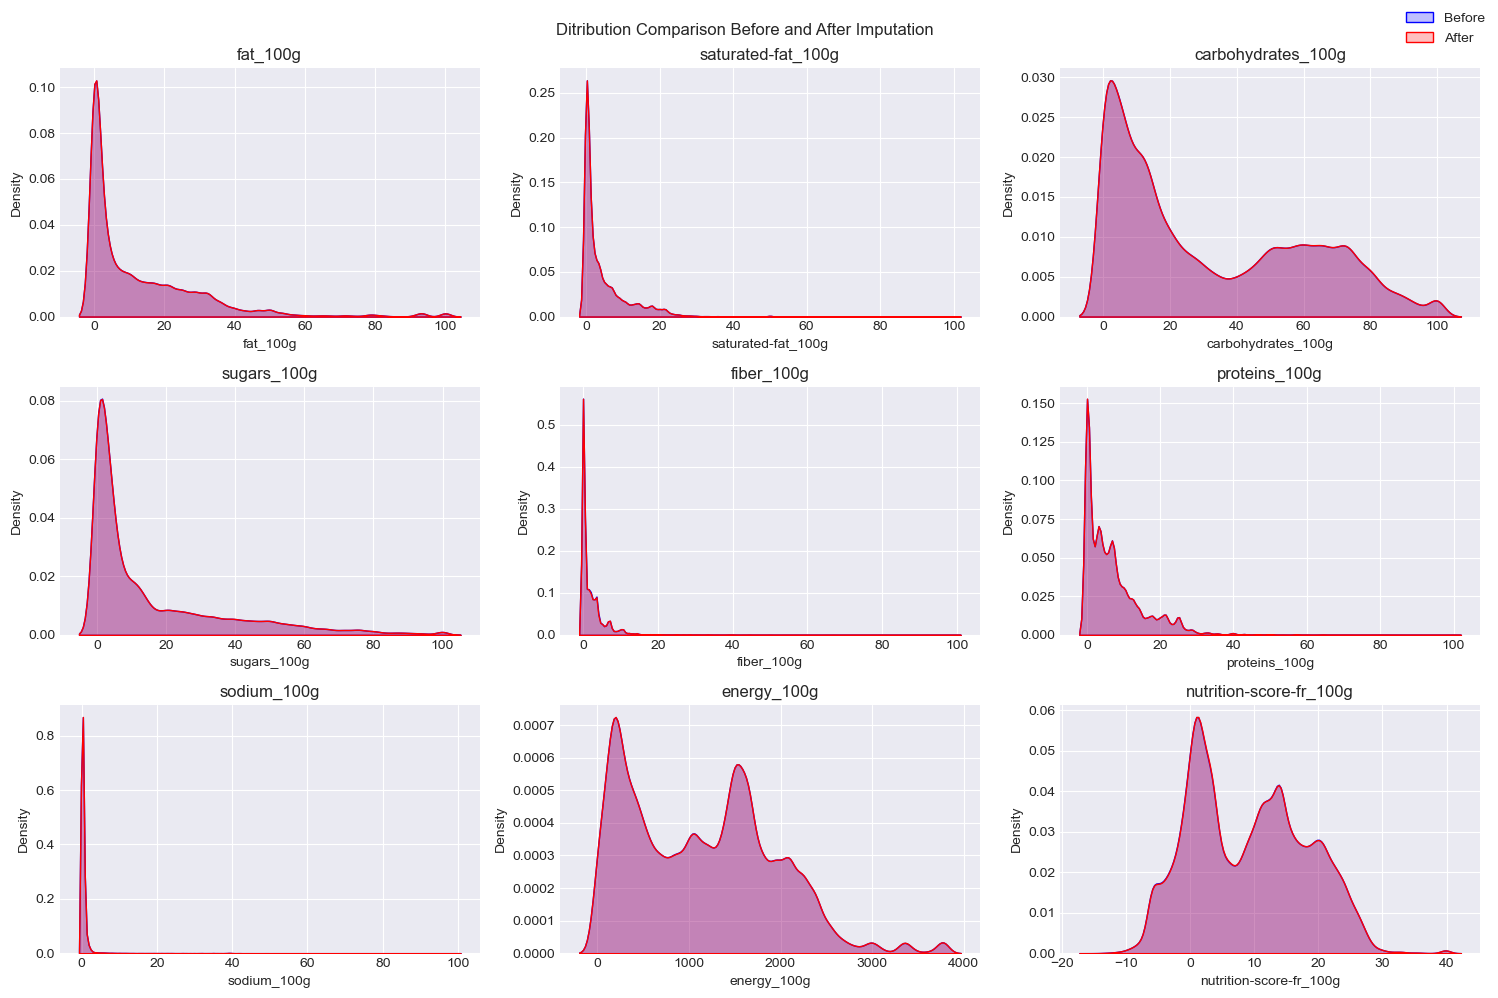

In [281]:
imputation_comparison(products, iterative_imputer_data)

Based on the distribution comparison, the iterative imputer method seems to yield good results as the distributions of the imputed features do not vary much

In [212]:
products = iterative_imputer_data

In [213]:
products.loc[products["nutrition-score-fr_100g"] > 40]

Empty DataFrame
Columns: [product_name, nutrition_grade_fr, energy_100g, fat_100g, saturated-fat_100g, carbohydrates_100g, sugars_100g, fiber_100g, proteins_100g, sodium_100g, nutrition-score-fr_100g, pnns_groups_1, pnns_groups_2, code]
Index: []

In [214]:
products.loc[products["nutrition-score-fr_100g"] > 40, "nutrition-score-fr_100g"] = 40

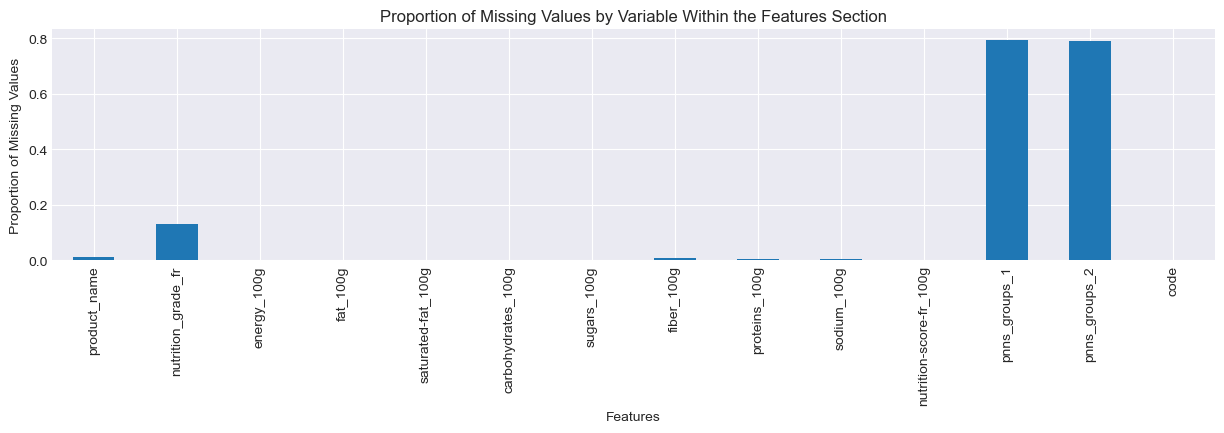

In [215]:
plot_missing_data(products, "Features")

### Testing SimpleImputer

In [216]:
median_imputed_data = products.copy()

In [217]:
def impute_median_data(df_to_impute, orginal_df):
    imputed_data = df_to_impute.copy()
    imputer = SimpleImputer(missing_values=np.nan, strategy="median")
    imputer.fit(df_to_impute[nutrition_facts])
    imputed_data[nutrition_facts] = imputer.transform(df_to_impute[nutrition_facts])
    orginal_df.loc[imputed_data.index] = imputed_data

In [218]:
for i, group in get_pnns_groups().items():
    impute_median_data(group, median_imputed_data)

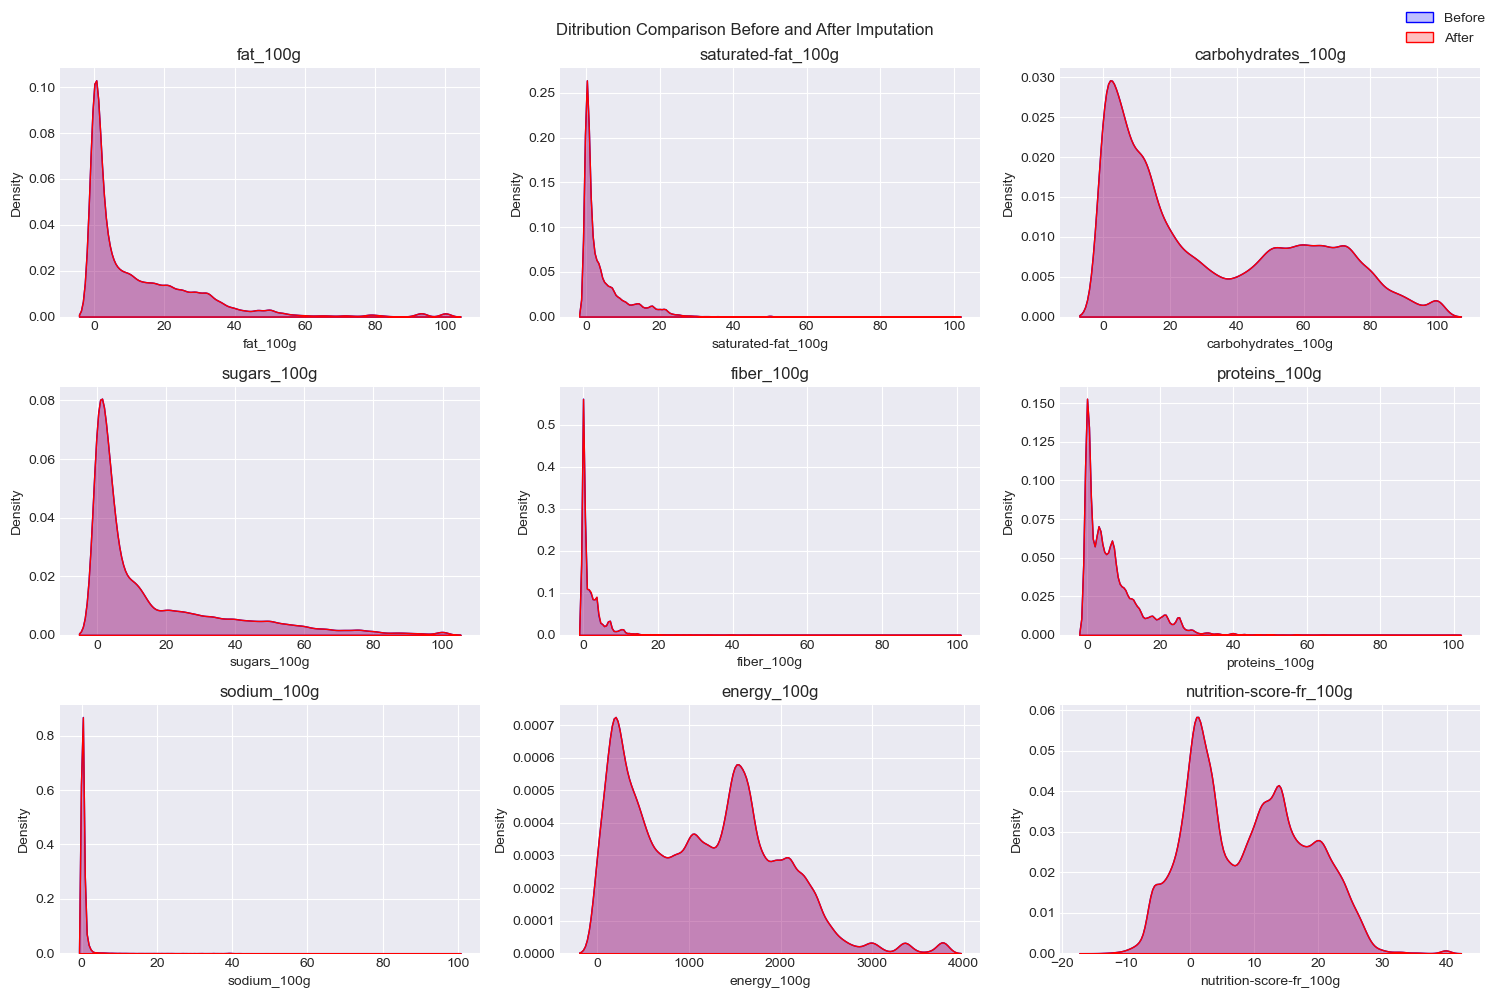

In [219]:
imputation_comparison(products, median_imputed_data)

This comparison plot suggests that the imputation of the remaining missing values using the median of each feature for each food group yielded satisfactory results as it did not impact the overall distribution

In [220]:
products = median_imputed_data

In [222]:
products.isna().mean()

product_name               0.012268
nutrition_grade_fr         0.130965
energy_100g                0.000000
fat_100g                   0.000000
saturated-fat_100g         0.000000
carbohydrates_100g         0.000000
sugars_100g                0.000000
fiber_100g                 0.000000
proteins_100g              0.003458
sodium_100g                0.004627
nutrition-score-fr_100g    0.000000
pnns_groups_1              0.792637
pnns_groups_2              0.792181
code                       0.000000
dtype: float64

Since proteins and sodium are not correlated to any other feature and since these products are not categorized, we will drop the few products with missing values

In [284]:
len(products.loc[products["sodium_100g"].isna() | products["proteins_100g"].isna()])

0

In [225]:
products = products.drop(
    products.loc[
        products["sodium_100g"].isna() | products["proteins_100g"].isna()
    ].index
)
products.isna().mean()

product_name               0.011810
nutrition_grade_fr         0.124144
energy_100g                0.000000
fat_100g                   0.000000
saturated-fat_100g         0.000000
carbohydrates_100g         0.000000
sugars_100g                0.000000
fiber_100g                 0.000000
proteins_100g              0.000000
sodium_100g                0.000000
nutrition-score-fr_100g    0.000000
pnns_groups_1              0.790990
pnns_groups_2              0.790563
code                       0.000000
dtype: float64

In [226]:
def fill_nutrition_grade(df):
    nutri_score_equivalence = {
        "a": [-16, -2],
        "b": [-2, 3],
        "c": [3, 11],
        "d": [11, 16],
        "e": [16, 40],
    }

    def map_to_grade(score):
        for grade, (lower_bound, upper_bound) in nutri_score_equivalence.items():
            if lower_bound <= score <= upper_bound:
                return grade
        display(grade)
        return None

    df["nutrition_grade_fr"] = df["nutrition-score-fr_100g"].apply(map_to_grade)

    return df


products = fill_nutrition_grade(products)

## Analysis

In [227]:
products.describe()

energy_100g       fat_100g  saturated-fat_100g  carbohydrates_100g  \
count  250218.000000  250218.000000       250218.000000       250218.000000   
mean     1136.026311      12.886285            4.787378           32.202288   
std       788.730507      17.285477            7.566230           28.602491   
min         0.000000       0.000000            0.000000            0.000000   
25%       397.000000       0.000000            0.000000            6.670000   
50%      1117.000000       5.560000            1.670000           21.430000   
75%      1674.000000      20.590000            6.670000           57.140000   
max      3770.000000     100.000000          100.000000          100.000000   

         sugars_100g     fiber_100g  proteins_100g    sodium_100g  \
count  250218.000000  250218.000000  250218.000000  250218.000000   
mean       15.644288       2.244310       7.130446       0.651845   
std        20.896100       4.196643       8.089324       2.646255   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.300000       0.000000       0.800000       0.030000   
50%         5.400000       0.500000       4.850000       0.236220   
75%        23.330000       3.100000      10.000000       0.551000   
max       100.000000     100.000000     100.000000     100.000000   

       nutrition-score-fr_100g  
count            250218.000000  
mean                  9.071895  
std                   8.939425  
min                 -15.000000  
25%                   1.108791  
50%                   9.000000  
75%                  16.000000  
max                  40.000000

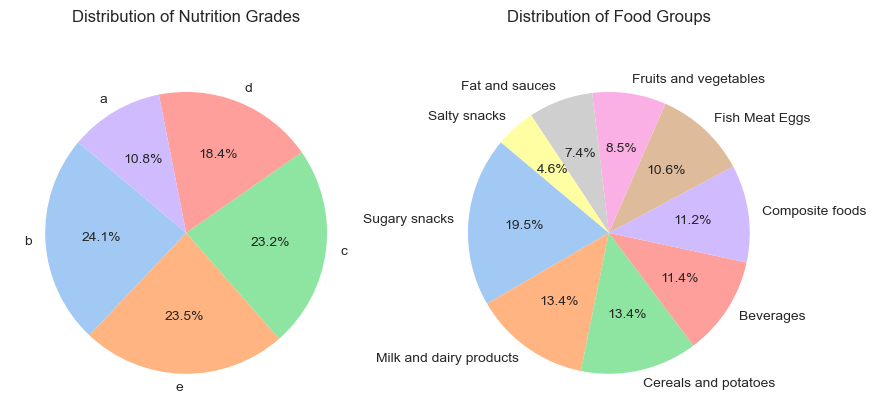

In [264]:
def plot_piechart(dfs):
    fig = plt.figure(figsize=(10, 8))
    i = 0
    for df, title in dfs:
        i += 1
        ax = plt.subplot(1, 2, i)
        plt.pie(
            df,
            labels=df.index,
            autopct="%1.1f%%",
            startangle=140,
        )
        plt.title(title, pad=25)
    plt.show()


plot_piechart(
    [
        (
            products["nutrition_grade_fr"].value_counts(),
            "Distribution of Nutrition Grades",
        ),
        (products["pnns_groups_1"].value_counts(), "Distribution of Food Groups"),
    ]
)

### PCA

In [229]:
products[numeric_values]

fat_100g  saturated-fat_100g  carbohydrates_100g  sugars_100g  \
1       28.570000           28.570000           64.290000        14.29   
2       17.860000            0.000000           60.710000        17.86   
3       57.140000            5.360000           17.860000         3.57   
7       18.750000            4.690000           57.810000        15.62   
12      36.670000            5.000000           36.670000         3.33   
...           ...                 ...                 ...          ...   
320751   2.800000            0.600000           74.800000         2.60   
320756  31.000000            7.635080           12.200000         9.60   
320757  34.775824            3.730000           50.385491         3.89   
320763   0.200000            0.200000            0.500000         0.50   
320771   0.000000            6.833151            0.000000         0.00   

        fiber_100g  proteins_100g  sodium_100g  energy_100g  \
1              3.6           3.57     0.000000       2243.0   
2              7.1          17.86     0.250000       1941.0   
3              7.1          17.86     0.482000       2540.0   
7              9.4          14.06     0.055000       1833.0   
12             6.7          16.67     0.633000       2230.0   
...            ...            ...          ...          ...   
320751         5.9          13.00     0.267717       1643.0   
320756         1.1           2.10     0.433071        569.0   
320757        12.2          21.22     0.039370       2406.0   
320763         0.2           0.50     0.010000         21.0   
320771         0.0           0.00     0.000000       2092.0   

        nutrition-score-fr_100g  
1                     14.000000  
2                      0.000000  
3                     12.000000  
7                      7.000000  
12                    12.000000  
...                         ...  
320751                -4.000000  
320756                 6.382338  
320757                 0.000000  
320763                 2.000000  
320771                16.679160  

[250218 rows x 9 columns]

In [342]:
values = products[numeric_values].values
scaler = StandardScaler()
scaler.fit(values)

StandardScaler()

In [234]:
values_scaled = scaler.transform(values)
values_scaled

array([[ 0.90733662,  3.14326527,  1.12185248, ..., -0.2463277 ,
         1.40349066,  0.55127876],
       [ 0.2877401 , -0.63273086,  0.99668831, ..., -0.15185438,
         1.02059612, -1.01482062],
       [ 2.56017251,  0.07568143, -0.50143594, ..., -0.06418314,
         1.78004589,  0.32755028],
       ...,
       [ 1.26635686, -0.13974992,  0.63572222, ..., -0.23145001,
         1.61015228, -1.01482062],
       [-0.73392885, -0.60629757, -1.10837729, ..., -0.24254876,
        -1.41370028, -0.79109214],
       [-0.74549928,  0.2703826 , -1.12585832, ..., -0.2463277 ,
         1.21204339,  0.85098094]])

In [235]:
idx = ["mean", "std"]

pd.DataFrame(values_scaled).describe().round(2).loc[idx, :]

0    1    2    3    4    5    6    7    8
mean -0.0  0.0  0.0  0.0 -0.0 -0.0 -0.0 -0.0 -0.0
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [236]:
pca = PCA(n_components=4)
pca.fit(values_scaled)

PCA(n_components=4)

[35.63 21.08 14.84 10.98]


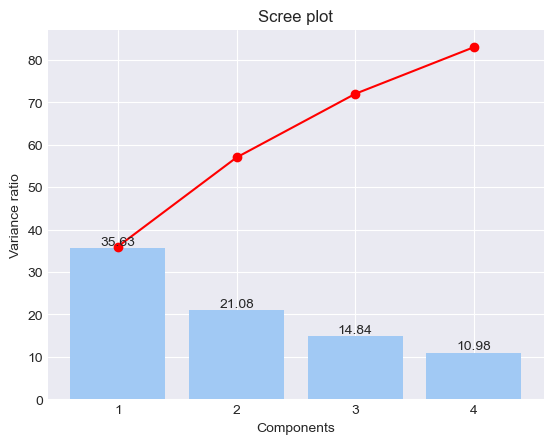

In [338]:
variance_ratio = (pca.explained_variance_ratio_ * 100).round(2)
variance_ratio_cum = variance_ratio.cumsum().round()

x_list = range(1, 4 + 1)
print(variance_ratio)
plt.bar(x_list, variance_ratio)
for index, value in enumerate(variance_ratio):
    plt.text(index + 1, value, str(value), ha="center", va="bottom")
plt.xticks(np.arange(0, 5, 1))
plt.plot(x_list, variance_ratio_cum, c="red", marker="o")
plt.xlabel("Components")
plt.ylabel("Variance ratio")
plt.title("Scree plot")
plt.show()

The low ratio of each individual component suggests that there isn't one clear component that would effectively summerize our data. Our variables seem mostly independent from one another.

The cumulated variance of the first 4 components amounts to 82.5% suggesting that additional components would not add much to the analysis. 

---

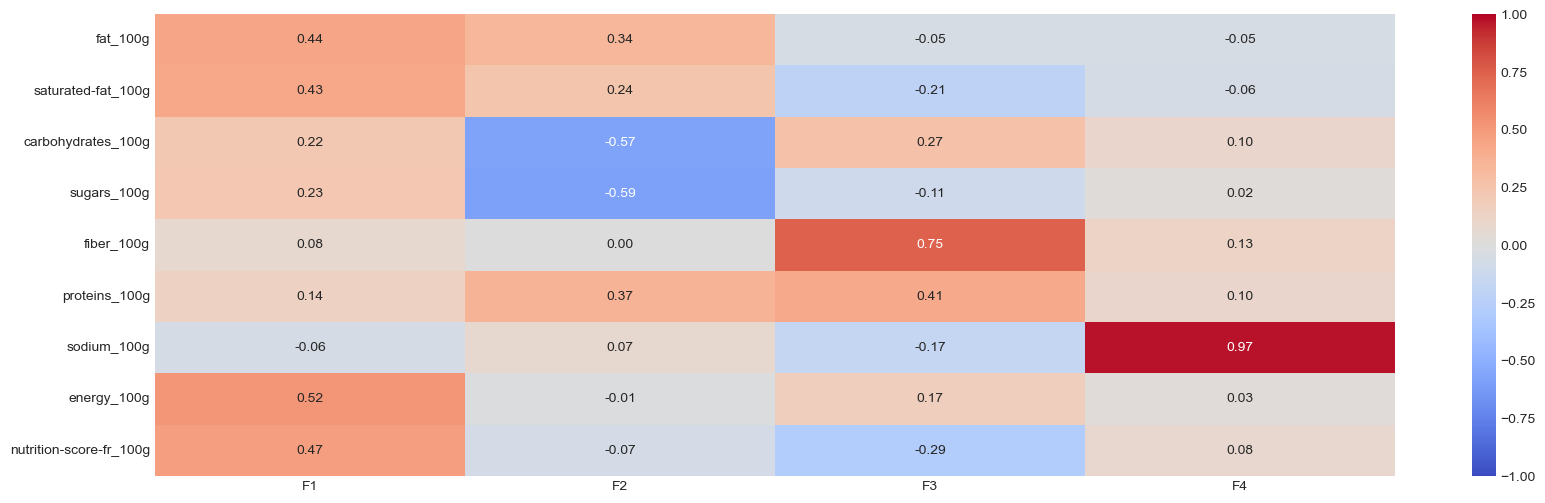

In [341]:
pcs = pd.DataFrame(pca.components_)
pcs.columns = numeric_values
pcs.index = [f"F{i}" for i in x_list]

fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.show()

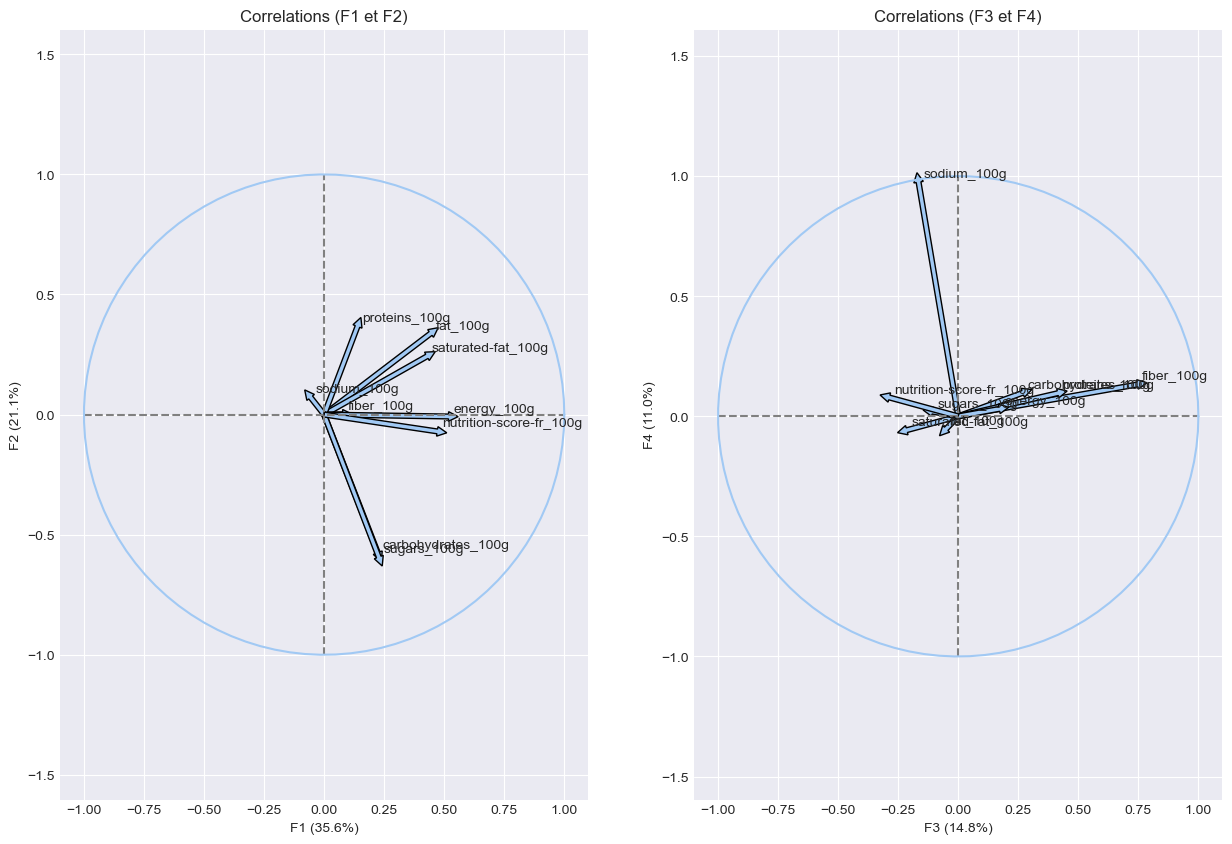

In [332]:
def plot_correlation_circle(pca, features, components):
    fig = plt.figure(figsize=(15, 10))
    num = 0
    for x, y in components:
        num += 1
        ax = plt.subplot(1, 2, num)
        for i in range(0, pca.components_.shape[1]):
            ax.arrow(
                0,
                0,
                pca.components_[x, i],
                pca.components_[y, i],
                head_width=0.04,
                head_length=0.04,
                width=0.02,
            )
            ax.text(
                pca.components_[x, i] + 0.02, pca.components_[y, i] + 0.02, features[i]
            )
        plt.plot([-1, 1], [0, 0], color="grey", ls="--")
        plt.plot([0, 0], [-1, 1], color="grey", ls="--")

        ax.set_xlabel(
            "F{} ({}%)".format(x + 1, round(100 * pca.explained_variance_ratio_[x], 1))
        )
        ax.set_ylabel(
            "F{} ({}%)".format(y + 1, round(100 * pca.explained_variance_ratio_[y], 1))
        )
        ax.set_title("Correlations (F{} et F{})".format(x + 1, y + 1))
        an = np.linspace(0, 2 * np.pi, 100)
        plt.plot(np.cos(an), np.sin(an))
        plt.axis("equal")
    plt.show()


plot_correlation_circle(pca, numeric_values, [(0, 1), (2, 3)])

The features that most contribute to F1 are fat, saturated fat, energy and the nutrition score, while F2 is mostly explained by carbs and sugars. 

F3 and F4 are mostly represented by fiber and sodium respectively and are therefore less interesting. 

---

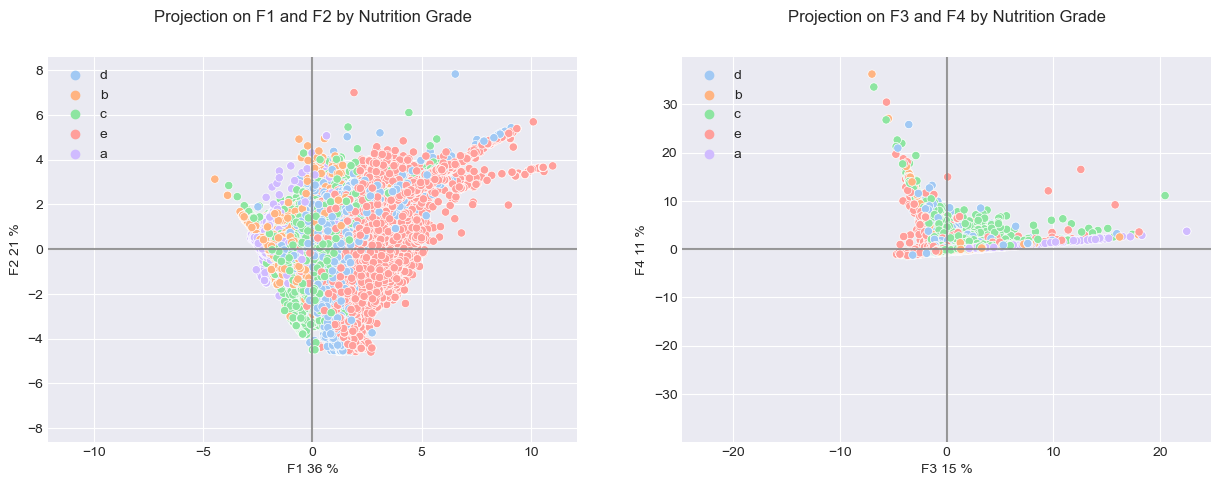

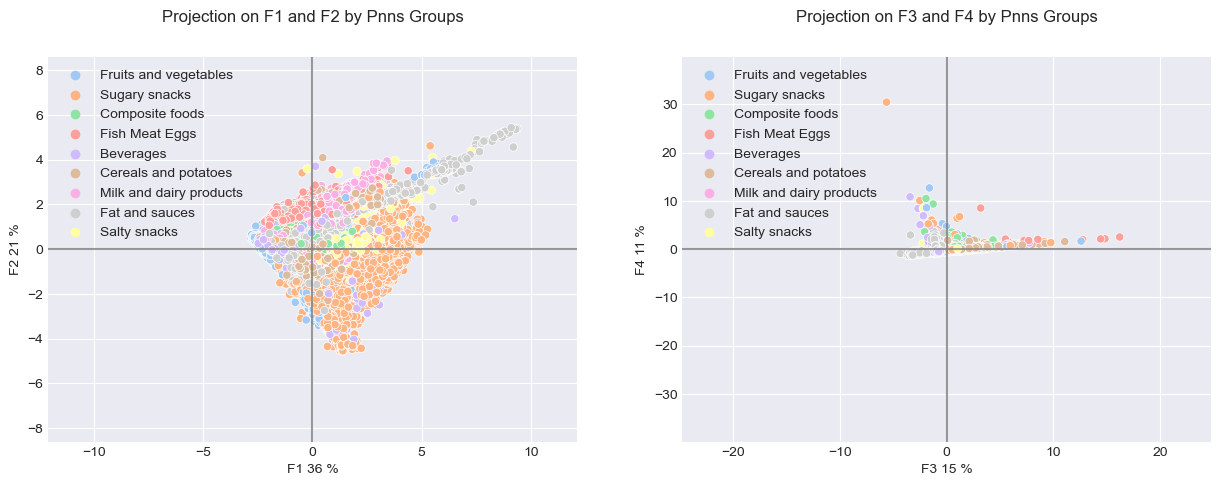

In [339]:
def display_factorial_planes(X_projected, components, pca, clusters, group):
    X_ = np.array(X_projected)
    fig = plt.figure(figsize=(15, 5))
    num = 0
    for x, y in components:
        num += 1
        ax = plt.subplot(1, 2, num)

        sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=clusters, ax=ax)

        v1 = str(round(100 * pca.explained_variance_ratio_[x])) + " %"
        v2 = str(round(100 * pca.explained_variance_ratio_[y])) + " %"

        ax.set_xlabel(f"F{x+1} {v1}")
        ax.set_ylabel(f"F{y+1} {v2}")

        x_max = np.abs(X_[:, x]).max() * 1.1
        y_max = np.abs(X_[:, y]).max() * 1.1

        ax.set_xlim(left=-x_max, right=x_max)
        ax.set_ylim(bottom=-y_max, top=y_max)

        plt.plot([-x_max, x_max], [0, 0], color="grey", alpha=0.8)
        plt.plot([0, 0], [-y_max, y_max], color="grey", alpha=0.8)
        plt.legend(loc="upper left")

        plt.title(f"Projection on F{x+1} and F{y+1} by {group}", pad=25)
    plt.show()


projected_values = pca.transform(values_scaled)
display_factorial_planes(
    projected_values,
    [(0, 1), (2, 3)],
    pca,
    products["nutrition_grade_fr"],
    "Nutrition Grade",
)

display_factorial_planes(
    projected_values, [(0, 1), (2, 3)], pca, products["pnns_groups_1"], "Pnns Groups"
)

These projections suggest the main components are explained by products with a lower nutri grade (D and E) which are more likely within the Fat and Sauces and Sugary Snacks pnns groups.

Whereas F3 seems to be mainly explained explained by A nutrigrade products.

### ANOVA

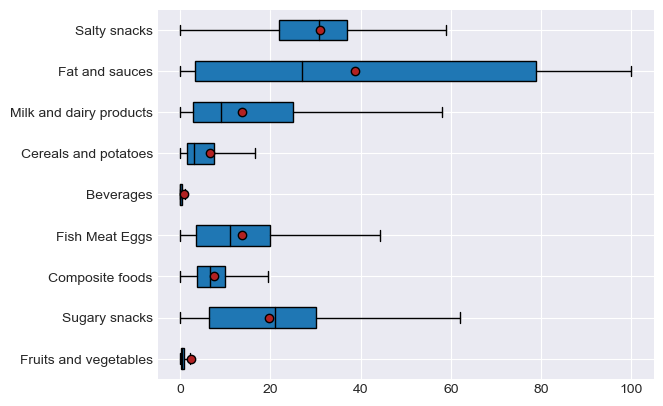

In [244]:
X = "pnns_groups_1"
Y = "fat_100g"

modalites = products.loc[products[X].notna(), X].unique()
groupes = []
for m in modalites:
    groupes.append(products[products[X] == m][Y])

medianprops = {"color": "black"}
meanprops = {"marker": "o", "markeredgecolor": "black", "markerfacecolor": "firebrick"}

plt.boxplot(
    groupes,
    labels=modalites,
    showfliers=False,
    medianprops=medianprops,
    vert=False,
    patch_artist=True,
    showmeans=True,
    meanprops=meanprops,
)
plt.show()

In [378]:
def anova(category):
    for feature in numeric_values:
        groups = products.groupby(category)[feature]
        stat, pvalue = st.f_oneway(*[group for group_name, group in groups])
        print(f"{feature}: statistic=%.3f, p=%.10f" % (stat, pvalue))


anova("pnns_groups_1")

fat_100g: statistic=3535.981, p=0.0000000000
saturated-fat_100g: statistic=1879.634, p=0.0000000000
carbohydrates_100g: statistic=12566.778, p=0.0000000000
sugars_100g: statistic=7594.400, p=0.0000000000
fiber_100g: statistic=2015.597, p=0.0000000000
proteins_100g: statistic=6154.807, p=0.0000000000
sodium_100g: statistic=709.354, p=0.0000000000
energy_100g: statistic=7041.935, p=0.0000000000
nutrition-score-fr_100g: statistic=5530.169, p=0.0000000000


In [384]:
anova("nutrition_grade_fr")

fat_100g: statistic=27912.316, p=0.0000000000
saturated-fat_100g: statistic=44507.779, p=0.0000000000
carbohydrates_100g: statistic=9111.911, p=0.0000000000
sugars_100g: statistic=17375.193, p=0.0000000000
fiber_100g: statistic=4667.277, p=0.0000000000
proteins_100g: statistic=2295.417, p=0.0000000000
sodium_100g: statistic=408.415, p=0.0000000000
energy_100g: statistic=49435.547, p=0.0000000000
nutrition-score-fr_100g: statistic=864269.788, p=0.0000000000


The results of the Anova shows that there are statistical differences between within the pnns groups for each feature